In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# fetching data from computer 
import pandas as pd
data=pd.read_csv(r"C:\Users\malik\Downloads\Telecom_customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# To fetch the details of rows
pd.set_option('display.max_rows',None)

In [4]:
# To fetch the detail of rows and coloumns
data.shape

(7043, 21)

In [5]:
# To fetch the details of columns 
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# To fetching the datatypes of the columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Here we are getting details of the data like null values mean,standard deviation and to identify outlier
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Here we are getting details of the data like null values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

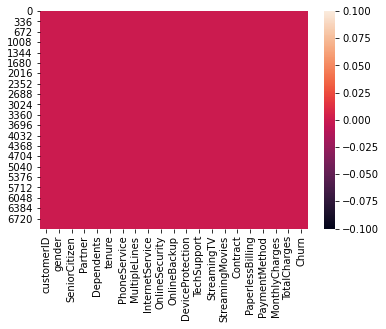

In [9]:
# Here we are getting details of the data like null values
sns.heatmap(data.isnull())

In [10]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
# Encode labels of multiple columns at once
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
# Print head
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [11]:
data.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

In [12]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [13]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'] = data['TotalCharges'].astype("float")

In [14]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [15]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['5505-OVWQW', '2675-IJRGJ', '5003-OKNNK', '5998-DZLYR', '6692-YQHXC', '3908-MKIMJ', '4402-FTBXC', '8344-WFMFH', '0867-LDTTC', '5982-XMDEX', '0280-XJGEX', '7129-ACFOG', '3292-PBZEJ', '6967-QIQRV', '3348-CFRNX', '8690-UPCZI', '9830-ECLEN', '4116-TZAQJ', '1345-GKDZZ', '4187-CINZD', '9300-AGZNL', '6705-LNMDD', '7603-USHJS', '6461-SZMCV', '5909-ECHUI', '9419-IPPBE', '6892-BOGQE', '3933-DQPWX', '2219-MVUSO', '3845-FXCYS', '3677-IYRBF', '6681-ZSEXG', '5231-FIQPA', '6579-JPICP', '7169-YWAMK', '0447-RXSGD', '1550-LOAHA', '9173-IVZVP', '0310-SUCIN', '3457-PQBYH', '5624-RYAMH', '7105-BENQF', '4057-FKCZK', '2834-JRTUA', '9054-FOWNV', '5178-LMXOP', '7560-QJAVJ', '5373-SFODM', '9796-MVYXX', '9853-JFZDU', '7852-LECYP', '3319-DWOEP', '4060-LDNLU', '1684-FLBGS', '8746-BFOAJ', '4445-KWOKW', '2418-TPEUN', '2926-JEJJC', '1769-GRUIK', '5989-OMNJE', '7337-CINUD', '2001-MCUUW', '1179-INLAT', '4827-LTQRJ', '4274-DRSQT', '1041-RXHRA', '5118-MUEYH', '8690-ZVLCL', '0215-BQKGS', '5995-WWKKG', '7020-OZKXZ', '9710-ZUSHQ', '6701-YVNQG', '9708-KFDBY', '1564-NTYXF', '8999-BOHSE', '2403-BCASL', '7799-DSEWS', '0562-FGDCR', '5813-UECBU', '1428-IEDPR', '8050-XGRVL', '5673-FSSMF', '0979-MOZQI', '5201-FRKKS', '3043-SUDUA', '5598-IKHQQ', '8207-DMRVL', '9586-JGQKH', '5176-LMJXE', '1485-YDHMM', '2194-IIQOF', '6496-SLWHQ', '5975-BAICR', '3757-NJYBX', '9588-OZDMQ', '2270-CHBFN', '1732-FEKLD', '2509-TFPJU', '1492-KGETH', '6233-HXJMX', '4003-FUSHP', '9529-OFXHY', '9256-JTBNZ', '1227-UDMZR', '4671-VJLCL', '5827-MWCZK', '0295-PPHDO', '9986-BONCE', '3096-GKWEB', '7005-CCBKV', '3247-ZVOUO', '1623-NLDOT', '6551-ZCOTS', '1597-LHYNC', '2514-GINMM', '3133-PZNSR', '6582-PLFUU', '4702-IOQDC', '7850-VWJUU', '9548-LIGTA', '0942-KOWSM', '8400-WZICQ', '9972-VAFJJ', '2202-OUTMO', '0781-LKXBR', '6386-SZZKH', '1625-JAIIY', '4541-RMRLG', '6168-WFVVF', '3278-FSIXX', '4647-XXZAM', '4524-QCSSM', '1766-GKNMI', '1231-YNDEK', '2592-SEIFQ', '8854-CCVSQ', '6179-GJPSO', '1208-DNHLN', '3317-VLGQT', '1641-BYBTK', '1506-YJTYT', '3796-ENZGF', '1794-SWWKL', '1709-EJDOX', '6814-ZPWFQ', '2346-LOCWC', '4673-KKSLS', '2088-IEBAU', '9058-MJLZC', '7901-HXJVA', '4061-UKJWL', '6103-QCKFX', '8100-HZZLJ', '2885-HIJDH', '9860-LISIZ', '4815-TUMEQ', '4853-RULSV', '0076-LVEPS', '5084-OOVCJ', '8652-YHIYU', '3754-DXMRT', '7054-DMVAS', '4662-EKDPQ', '5480-TBGPH', '2740-TVLFN', '2983-ZANRP', '5597-GLBUC', '5054-IEXZT', '8106-GWQOK', '7124-UGSUR', '3338-CVVEH', '3642-GKTCT', '9605-WGJVW', '9578-VRMNM', '6094-ZIVKX', '9822-OAOVB', '6923-JHPMP', '4393-GEADV', '9728-FTTVZ', '0040-HALCW', '0820-FNRNX', '2888-ADFAO', '8393-DLHGA', '1784-BXEFA', '8510-TMWYB', '3174-AKMAS', '2886-KEFUM', '0436-TWFFZ', '0196-VULGZ', '7853-GVUDZ', '5281-BUZGT', '3658-QQJYD', '1707-HABPF', '7105-MXJLL', '2120-SMPEX', '1929-ZCBHE', '7089-RKVSZ', '4937-QPZPO', '9564-KCLHR', '1522-VVDMG', '4324-AHJKS', '7567-ECMCM', '2085-JVGAD', '4785-NKHCX', '5702-KVQRD', '7833-PKIHD', '3870-MQAMG', '1057-FOGLZ', '3594-UVONA', '2696-ECXKC', '7665-NKLAV', '2002-MZHWP', '6212-ATMLK', '1131-ALZWV', '3950-VPYJB', '3640-PHQXK', '5609-CEBID', '5709-LVOEQ', '5364-XYIRR', '9306-CPCBC', '2867-UIMSS', '1942-OQFRW', '9142-XMYJH', '2408-PSJVE', '3411-WLRSQ', '7596-LDUXP', '7182-OVLBJ', '0285-INHLN', '1226-IENZN', '1342-JPNKI', '6905-NIQIN', '8755-IWJHN', '4198-VFOEA', '9633-DENPU', '9950-MTGYX', '7273-TEFQD', '0519-XUZJU', '1320-HTRDR', '0723-FDLAY', '9481-IEBZY', '7511-YMXVQ', '1397-XKKWR', '3061-BCKYI', '3397-AVTKU', '6635-CPNUN', '5803-NQJZO', '7861-UVUFT', '4896-CPRPF', '9518-IMLHK', '4320-QMLLA', '8727-XDPUD', '4554-YGZIH', '6732-FZUGP', '7649-SIJJF', '9881-VCZEP', '6419-ZTTLE', '0999-QXNSA', '9593-CVZKR', '1932-UEDCX', '9773-PEQBZ', '8224-IVVPA', '7240-FQLHE', '8263-OKETD', '4484-CGXFK', '5832-XKAES', '4690-PKDQG', '6979-TNDEU', '9909-DFRJA', '8404-VIOMB', '3451-VAWLI', '7317-GGVPB', '0302-JOIVN', '7665-TOALD', '2439-QKJUL', '5310-NOOVA', '0080-EMYVY', '9822-BIIGN', '3538-WZPHD', '8039-EQPIM', '4854-SSLTN', '7473-ZBDSN', '6537-OTKMY', '1872-EBWSC', '6586-MYGKD', '7083-YNSKY', '5989-PGKJB', '8947-YRTDV', '6860-YRJZP', '0407-BDJKB', '6928-ONTRW', '5167-ZFFMM', '5046-NUHWD', '1552-CZCLL', '9695-IDRZR', '2753-JMMCV', '5095-ETBRJ', '2267-FPIMA', '2823-LKABH', '8605-ITULD', '0328-GRPMV', '4361-FEBGN', '8008-ESFLK', '6726-WEXXK', '6100-FJZDG', '8499-BRXTD', '4735-ASGMA', '2636-OHFMN', '1998-VHJHK', '7576-OYWBN', '9074-KGVOX', '3002-WQZWT', '0939-YAPAF', '7752-XUSCI', '2952-QAYZF', '2065-MMKGR', '0594-UFTUL', '8645-KWHJO', '6621-YOBKI', '4646-QZXTF', '7789-CRUVC', '9137-UIYPG', '6848-HJTXY', '6952-OMNWB', '8329-UTMVM', '3678-MNGZX', '5821-MMEIL', '3398-GCPMU', '1163-ONYEY', '0174-QRVVY', '8092-NLTGF', '9136-ALYBR', '0235-KGSLC', '7824-PANSQ', '3571-RFHAR', '9396-ZSFLL', '0537-QYZZN', '2379-ENZGV', '0324-BRPCJ', '3439-GVUSX', '4489-SNOJF', '8623-ULFNQ', '3946-JEWRQ', '4178-EGMON', '8812-ZRHFP', '2773-OVBPK', '5293-WXJAK', '8922-NPKBJ', '6082-GLJIX', '3146-JTQHR', '3070-BDOQC', '3629-WEAAM', '1090-PYKCI', '2439-LYPMQ', '1016-DJTSV', '1996-DBMUS', '9761-XUJWD', '4813-HQMGZ', '5233-AOZUF', '0993-OSGPT', '8496-EJAUI', '5171-EPLKN', '0430-IHCDJ', '4315-MURBD', '9448-REEVD', '7136-RVDTZ', '1215-FIGMP', '7560-QRBXH', '9795-NREXC', '3948-XHGNA', '8782-LKFPK', '7978-DKUQH', '0641-EVBOJ', '4177-JPDFU', '3785-KTYSH', '2800-QQUSO', '1803-BGNBD', '9819-FBNSV', '4735-BJKOU', '2387-KDZQY', '4879-GZLFH', '4361-JEIVL', '7691-XVTZH', '8713-IGZSO', '4745-LSPLO', '6408-WHTEF', '3096-YXENJ', '9055-MOJJJ', '3976-NLDEZ', '3235-ETOOB', '8844-TONUD', '4248-HCETZ', '5149-CUZUJ', '5133-VRSAB', '0004-TLHLJ', '9369-XFEHK', '6741-QRLUP', '8930-XOTDP', '3795-GWTRD', '4039-PIMHX', '9101-NTIXF', '4317-VTEOA', '3808-HFKDE', '9019-QVLZD', '1810-BOHSY', '6762-QVYJO', '3373-YZZYM', '4759-PXTAN', '9526-JAWYF', '5797-APWZC', '3178-FESZO', '0186-CAERR', '8099-MZPUJ', '2528-HFYZX', '7463-IFMQU', '6258-NGCNG', '3486-NPGST', '3223-WZWJM', '7901-TBKJX', '3158-MOERK', '4302-ZYFEL', '8651-ENBZX', '2000-MPKCA', '4629-NRXKX', '2581-VKIRT', '2082-CEFLT', '2806-MLNTI', '5196-SGOAK', '2929-QNSRW', '8883-ANODQ', '5857-TYBCJ', '5568-DMXZS', '1029-QFBEN', '3841-NFECX', '8597-CWYHH', '9747-DDZOS', '6729-FZWSY', '6738-ISCBM', '4043-MKDTV', '2276-YDAVZ', '0581-MDMPW', '7054-ENNGU', '6746-WAUWT', '4468-YDOVK', '0675-NCDYU', '0380-NEAVX', '8722-PRFDV', '1172-VIYBP', '0123-CRBRT', '2676-SSLTO', '1282-IHQAC', '3900-AQPHZ', '7895-VONWT', '2925-VDZHY', '2862-JVEOY', '8887-IPQNC', '1066-JKSGK', '8485-GJCDN', '7065-YUNRY', '1221-GHZEP', '3487-EARAT', '9944-AEXBM', '7492-TAFJD', '5977-CKHON', '4501-VCPFK', '3426-NIYYL', '6996-KNSML', '0690-SRQID', '0484-JPBRU', '4567-AKPIA', '2587-YNLES', '3704-IEAXF', '8807-OPMBM', '2927-QRRQV', '0526-SXDJP', '7233-PAHHL', '4912-PIGUY', '0374-IOEGQ', '6202-JVYEU', '9364-YKUVW', '9095-HFAFX', '0623-IIHUG', '2272-QAGFO', '3178-CIFOT', '1565-RHDJD', '7521-AFHAB', '1135-HIORI', '0853-TWRVK', '1600-DILPE', '8246-SHFGA', '0637-UBJRP', '9474-PHLYD', '7056-IMHCC', '5159-YFPKQ', '3489-VSFRD', '6620-HVDUJ', '4742-TXUEX', '5751-USDBL', '3694-DELSO', '1730-ZMAME', '9867-NNXLC', '9734-YWGEX', '7471-WNSUF', '1150-WFARN', '5678-VFNEQ', '8467-WYNSR', '9099-FTUHS', '5380-AFSSK', '4070-OKWVH', '7164-BPTUT', '7710-JSYOA', '1354-YZFNB', '6586-PSJOX', '7233-DRTRF', '0365-BZUWY', '4462-CYWMH', '1746-TGTWV', '2027-DNKIV', '5419-JPRRN', '2466-FCCPT', '4983-CLMLV', '8199-ZLLSA', '5650-VDUDS', '8861-HGGKB', '3653-NCRDJ', '1051-EQPZR', '2931-SVLTV', '3823-KYNQY', '1393-IMKZG', '3161-ONRWK', '5627-TVBPP', '1498-NHTLT', '2428-HYUNX', '8945-MUQUF', '4323-OHFOW', '5692-ICXLW', '2878-RMWXY', '4238-HFHSN', '4685-ERGHK', '6311-UEUME', '4922-CVPDX', '4980-URKXC', '4360-PNRQB', '0376-YMCJC', '3714-XPXBW', '4710-FDUIZ', '6595-COKXZ', '8838-GPHZP', '4307-KWMXE', '8957-THMOA', '9979-RGMZT', '4163-NCJAK', '4455-BFSPD', '4967-WPNCF', '5602-BVFMK', '3082-VQXNH', '0666-UXTJO', '7554-NEWDD', '1095-WGNGG', '4119-ZYPZY', '8992-JQYUN', '3896-RCYYE', '2995-YWTCD', '7277-OZCGZ', '5387-ASZNZ', '9090-SGQXL', '9769-TSBZE', '3192-NQECA', '9174-IHETN', '9993-LHIEB', '9351-LZYGF', '1306-RPWXZ', '4952-YSOGZ', '2928-HLDBA', '2220-IAHLS', '0883-EIBTI', '7673-LPRNY', '9972-NKTFD', '4378-MYPGO', '8345-MVDYC', '4636-TVXVG', '0619-OLYUR', '2722-JMONI', '3594-KADLU', '8974-OVACP', '8544-JNBOX', '1043-UXOVO', '0831-JNISG', '7168-HDQHG', '2207-RYYRL', '2097-YVPKN', '6794-HKIAJ', '2462-XIIJB', '5832-TRLPB', '8784-CGILN', '6096-EGVTU', '7916-VCCPB', '4785-FCIFB', '7410-YTJIK', '7740-KKCXF', '1725-IQNIY', '1989-PRJHP', '5815-HGGHV', '4825-FUREZ', '3272-VUHPV', '0616-ATFGB', '9625-RZFUK', '7932-WPTDS', '9554-DFKIC', '0268-QKIWO', '5453-YBTWV', '4106-HADHQ', '1755-FZQEC', '1866-ZSLJM', '9170-CCKOU', '7293-LSCDV', '7957-RYHQD', '3097-NNSPB', '3074-GQWYX', '1136-XGEQU', '0848-ZGQIJ', '1680-VDCWW', '5996-DAOQL', '5092-STPKP', '0917-EZOLA', '3961-SXAXY', '9544-PYPSJ', '5016-LIPDW', '0661-KBKPA', '2545-LXYVJ', '9362-MWODR', '7621-VPNET', '0743-HNPFG', '2907-ILJBN', '6695-FRVEC', '2898-LSJGD', '8650-RHRKE', '5515-AKOAJ', '9776-OJUZI', '3519-ZKXGG', '7901-IIDQV', '2790-XUYMV', '3597-MVHJT', '5129-JLPIS', '3717-OEAUQ', '8566-YPRGL', '8123-QBNAZ', '6813-GZQCG', '8676-TRMJS', '3346-BRMIS', '6941-KXRRV', '6476-EPYZR', '9927-DSWDF', '1951-IEYXM', '0177-PXBAT', '2903-YYTBW', '0357-NVCRI', '1641-RQDAY', '0536-ACXIP', '3115-JPJDD', '4860-IJUDE', '2369-UAPKZ', '6349-JDHQP', '3131-NWVFJ', '5315-CKEQK', '4283-FUTGF', '8901-HJXTF', '6048-QBXKL', '7780-OTDSO', '7594-RQHXR', '0564-JJHGS', '5980-BDHPY', '3606-TWKGI', '8779-QRDMV', '9063-ZGTUY', '1265-BCFEO', '8942-DBMHZ', '9097-ZUBYC', '6692-UDPJC', '1845-CSBRZ', '7742-MYPGI', '8559-CIZFV', '6036-TTFYU', '6211-WHMYA', '1987-AUELQ', '8756-RDDLT', '6352-TWCAU', '5947-SGKCL', '5799-JRCZO', '1371-OJCEK', '5816-JMLGY', '5294-CDGWY', '3920-HIHMQ', '1934-SJVJK', '3563-SVYLG', '9938-PRCVK', '6959-GQEGV', '6051-PTVNS', '1567-DSCIC', '9503-XJUME', '4223-BKEOR', '3372-KWFBM', '3671-SHRSP', '8229-MYEJZ', '4776-XSKYQ', '8869-LIHMK', '7929-SKFGK', '8465-SBRXP', '6976-BWGLQ', '4277-BWBML', '2314-TNDJQ', '2144-ESWKO', '7089-IVVAZ', '7041-TXQJH', '1751-NCDLI', '7028-DVOIQ', '9356-AXGMP', '2027-FECZV', '8263-QMNTJ', '6818-DJXAA', '8062-YBDOE', '1596-BBVTG', '6047-YHPVI', '0956-SYCWG', '6384-VMJHP', '9372-TXXPS', '0604-THJFP', '4671-LXRDQ', '6394-MFYNG', '9494-BDNNC', '8919-FYFQZ', '2656-TABEH', '9828-QHFBK', '5696-QURRL', '2254-DLXRI', '2569-WGERO', '8167-GJLRN', '1379-FRVEB', '2037-XJFUP', '6169-PPETC', '6034-YMTOB', '7601-DHFWZ', '1468-DEFNC', '9705-ZJBCG', '3863-IUBJR', '6328-ZPBGN', '3557-HTYWR', '2794-XIMMO', '4723-BEGSG', '0793-TWELN', '5666-MBJPT', '5168-MSWXT', '1741-WTPON', '9974-JFBHQ', '4062-HBMOS', '3546-GHEAE', '8319-QBEHW', '5124-EOGYE', '3850-OKINF', '7139-JZFVG', '8966-KZXXA', '5760-FXFVO', '8513-OLYGY', '1716-LSAMB', '4803-AXVYP', '0269-XFESX', '4290-BSXUX', '3500-NSDOA', '8757-TFHHJ', '1272-ILHFG', '9894-EZEWG', '6302-JGYRJ', '1518-VOWAV', '9647-ERGBE', '1389-WNUIB', '2236-HILPA', '1848-LBZHY', '0374-FIUCA', '2181-UAESM', '3244-DCJWY', '0345-XMMUG', '8908-NMQTX', '0685-MLYYM', '1875-QIVME', '8608-OZTLB', '3154-HMWUU', '0655-RBDUG', '2040-OBMLJ', '5297-MDOIR', '2111-DWYHN', '8570-KLJYJ', '4080-IIARD', '3569-JFODW', '6827-IEAUQ', '0872-NXJYS', '7779-ORAEL', '6828-HMKWP', '7594-LZNWR', '9093-FPDLG', '7926-IJOOU', '2144-BFDSO', '6631-HMANX', '6508-NJYRO', '3038-PQIUY', '6959-UWKHF', '8717-VCTXJ', '6917-FIJHC', '3402-XRIUO', '9867-XOBQA', '4523-WXCEF', '2378-YIZKA', '1972-XMUWV', '0376-OIWME', '2530-FMFXO', '8564-LDKFL', '4625-XMOYM', '1502-XFCVR', '5025-GOOKI', '0556-FJEGU', '3871-IKPYH', '4849-PYRLQ', '3198-VELRD', '6532-YLWSI', '6598-KELSS', '4751-ERMAN', '9835-ZIITK', '3877-JRJIP', '7520-HQWJU', '4009-ALQFH', '8387-MOJJT', '5176-OLSKT', '0788-DXBFY', '9453-PATOS', '2673-ZALNP', '6924-TDGMT', '4959-JOSRX', '6050-IJRHS', '1452-KIOVK', '8402-OOOHJ', '1087-UDSIH', '5219-YIPTK', '0906-QVPMS', '5339-PXDVH', '9821-POOTN', '0094-OIFMO', '5916-QEWPT', '6425-YQLLO', '1447-PJGGA', '3982-XWFZQ', '1120-BMWUB', '7244-KXYZN', '0378-NHQXU', '0330-IVZHA', '6300-BWMJX', '7148-XZPHA', '9968-FFVVH', '0420-BWTPW', '1784-EZDKJ', '0093-EXYQL', '5074-FBGHB', '8225-BTJAU', '9158-VCTQB', '2378-HTWFW', '6143-JQKEA', '8189-XRIKE', '5392-AKEMH', '3199-XGZCY', '5696-EXCYS', '5748-RNCJT', '2604-IJPDU', '8184-WMOFI', '4193-ORFCL', '7841-TZDMQ', '5899-MQZZL', '2834-SPCJV', '2187-PKZAY', '3090-QFUVD', '4514-GFCFI', '8648-PFRMP', '6253-WRFHY', '4013-GUXND', '5382-SOYZL', '0533-BNWKF', '4759-TRPLW', '8552-OBVRU', '3249-ZPQRG', '6769-DCQLI', '8267-ZNYVZ', '2400-XIWIO', '0786-VSSUD', '9909-IDLEK', '1478-VPOAD', '8835-VSDSE', '5760-WRAHC', '2845-HSJCY', '3878-AVSOQ', '3156-QLHBO', '1821-BUCWY', '9750-BOOHV', '6439-LAJXL', '5052-PNLOS', '7963-GQRMY', '3298-QEICA', '0799-DDIHE', '0348-SDKOL', '9871-ELEYA', '6778-EICRF', '6286-SUUWT', '9481-WHGWY', '3892-NXAZG', '1980-KXVPM', '1024-VRZHF', '8966-OIQHG', '5468-BPMMO', '5010-IPEAQ', '3021-VLNRJ', '4853-OITSN', '1599-EAHXY', '4631-OACRM', '9833-TGFHX', '8606-CIQUL', '8249-THVEC', '5143-EGQFK', '2252-JHJGE', '0383-CLDDA', '6635-MYYYZ', '0404-AHASP', '0565-JUPYD', '0927-LCSMG', '3786-WOVKF', '5296-PSYVW', '5876-HZVZM', '2851-STERV', '8259-DZLIZ', '8146-QQKZH', '1069-XAIEM', '9576-SYUHJ', '5327-XOKKY', '5028-GZLDO', '9290-SHCMB', '7526-BEZQB', '9426-SXNHE', '4929-ROART', '0224-HJAPT', '4115-BNPJY', '8992-OBVDG', '8800-JOOCF', '3668-QPYBK', '7695-PKLCZ', '7483-IQWIB', '7426-GSWPO', '5288-AHOUP', '9565-DJPIB', '3787-TRIAL', '4452-QIIEB', '2996-XAUVF', '3144-AUDBS', '0406-BPDVR', '2169-RRLFW', '2616-FLVQC', '5981-ZVXOT', '5376-PCKNB', '8450-UYIBU', '3316-UWXUY', '2691-NZETQ', '7943-RQCHR', '3307-TLCUD', '4081-DYXAV', '6522-YRBXD', '2202-CUYXZ', '5593-SUAOO', '4957-TIALW', '3769-MHZNV', '8819-WFGGJ', '8008-HAWED', '4830-FAXFM', '2924-KHUVI', '5533-NHFRF', '6728-CZFEI', '8263-JQAIK', '9817-APLHW', '9000-PLFUZ', '6376-GAHQE', '8755-OGKNA', '1078-TDCRN', '3329-WDIOK', '6128-CZOMY', '6038-GCYEC', '4800-VHZKI', '5834-ASPWA', '6103-BOCOU', '6227-HWPWX', '5047-LHVLY', '4872-JCVCA', '8375-DKEBR', '9847-HNVGP', '6968-URWQU', '5318-IXUZF', '7219-TLZHO', '9518-XXBXE', '9798-OPFEM', '3914-FDRHP', '8821-XNHVZ', '2176-LVPNX', '3496-LFSZU', '2805-AUFQN', '7330-WZLNC', '2969-VAPYH', '9940-HPQPG', '5480-HPRRX', '2712-SYWAY', '3665-JATSN', '6986-IXNDM', '9053-JZFKV', '1101-SSWAG', '0687-ZVTHB', '8364-TRMMK', '1345-ZUKID', '1131-QQZEB', '1919-RTPQD', '3982-DQLUS', '9770-LXDBK', '0254-WWRKD', '5808-TOTXO', '6435-SRWBJ', '3737-XBQDD', '1952-DVVSW', '3999-WRNGR', '9305-CDSKC', '9820-RMCQV', '1449-XQEMT', '6873-UDNLD', '3312-UUMZW', '1941-HOSAM', '8785-CJSHH', '7996-BPXHY', '2674-MLXMN', '0115-TFERT', '6729-GDNGC', '7551-DACSP', '3621-CEOVK', '4079-VTGLK', '7036-ZZKBD', '4903-UYAVB', '7250-EQKIY', '3441-CGZJH', '7615-ESMYF', '0516-VRYBW', '0804-XBFBV', '2676-ISHSF', '1075-BGWOH', '5233-GEEAX', '2919-HBCJO', '5655-JSMZM', '6007-TCTST', '5016-ETTFF', '8148-BPLZQ', '5049-MUBWG', '4676-WLUHT', '5848-FHRFC', '4760-XOHVN', '4236-XPXAV', '6152-ONASV', '5458-CQJTA', '8049-WJCLQ', '3251-YMVWZ', '4201-JMNGR', '5995-LFTLE', '9420-LOJKX', '2866-IKBTM', '5180-UCIIQ', '5188-HGMLP', '7205-BAIAD', '2770-NSVDG', '1518-OMDIK', '8450-JOVAH', '3128-YOVTD', '7402-EYFXX', '7459-IMVYU', '5397-NSKQG', '0057-QBUQH', '4576-CSAJH', '4855-SNKMY', '4847-QNOKA', '6680-NENYN', '9488-FYQAU', '6923-AQONU', '1254-IZEYF', '0308-IVGOK', '8413-VONUO', '0567-XRHCU', '9190-MFJLN', '5073-WXOYN', '5366-OBVMR', '5707-ORNDZ', '7839-QRKXN', '5791-KAJFD', '5213-TWWJU', '6427-FEFIG', '6360-SVNWV', '8818-DOPVL', '4749-VFKVB', '7480-SPLEF', '2233-TXSIU', '9617-UDPEU', '9537-VHDTA', '2761-OCIAX', '8191-XWSZG', '3374-LXDEV', '3351-NQLDI', '9589-ABEPT', '2115-BFTIW', '8064-RAVOH', '5019-GQVCR', '8707-RMEZH', '0384-RVBPI', '9079-LWTFD', '0895-DQHEW', '0761-AETCS', '7394-LWLYN', '6366-ZGQGL', '6786-OBWQR', '0031-PVLZI', '8873-TMKGR', '2189-WWOEW', '4847-TAJYI', '0623-GDISB', '6752-APNJL', '4229-CZMLL', '4176-RELJR', '5248-RPYWW', '5619-PTMIK', '3620-MWJNE', '3910-MRQOY', '9891-NQDBD', '8792-AOROI', '4815-YOSUK', '1257-SXUXQ', '8160-HOWOX', '5951-AOFIH', '5482-VXSXJ', '6372-RFVNS', '8040-MNRTF', '8979-CAMGB', '6851-WEFYX', '0529-ONKER', '8571-ZCMCX', '4625-LAMOB', '7340-KEFQE', '7938-OUHIO', '1442-BQPVU', '3165-HDOEW', '2189-UXTKY', '9933-QRGTX', '2359-KMGLI', '9796-BPKIW', '0842-IWYCP', '7587-AOVVU', '1399-UBQIU', '7989-CHGTL', '8874-EJNSR', '6878-GGDWG', '0423-UDIJQ', '0786-IVLAW', '4706-DGAHW', '4537-CIBHB', '5419-CONWX', '6134-KWTBV', '7855-DIWPO', '5876-QMYLD', '5605-XNWEN', '7217-JYHOQ', '8185-UPYBR', '1925-LFCZZ', '3552-CTCYF', '2386-OWURY', '6103-LIANB', '1370-GGAWX', '9133-AYJZG', '3951-NJCVI', '6599-CEBNN', '0083-PIVIK', '9003-CPATH', '6257-DTAYD', '5572-ZDXHY', '9505-SQFSW', '5712-PTIWW', '9629-NHXFW', '8646-JCOMS', '7994-UYIVZ', '0193-ESZXP', '8752-STIVR', '0810-DHDBD', '0207-MDKNV', '3842-IYKUE', '2050-ONYDQ', '1960-UYCNN', '0042-RLHYP', '8022-BECSI', '7660-HDPJV', '9885-MFVSU', '2830-LEWOA', '1371-WEPDS', '7326-RIGQZ', '0420-HLGXF', '2808-CHTDM', '1303-SRDOK', '7602-DBTOU', '9681-OXGVC', '2266-FUBDZ', '1895-QTKDO', '2380-DAMQP', '7963-SHNDT', '2608-BHKFN', '6946-LMSQS', '2178-PMGCJ', '8107-RZLNV', '3717-FDJFU', '0877-SDMBN', '7254-IQWOZ', '5343-SGUBI', '3701-SFMUH', '4360-QRAVE', '7760-OYPDY', '2789-CZANW', '2800-VEQXM', '9057-MSWCO', '9661-ACXBS', '1635-NZATJ', '1813-JLKWR', '8144-DGHXP', '5527-ACHSO', '8879-XUAHX', '3022-BEXHZ', '8809-XKHMD', '2578-JQPHZ', '0021-IKXGC', '1009-IRMNA', '2626-URJFX', '0369-ZGOVK', '6023-GSSXW', '0023-XUOPT', '8229-TNIQA', '2208-UGTGR', '5461-QKNTN', '7279-NMVJC', '6990-YNRIO', '4811-JBUVU', '6270-OMFIW', '5311-IHLEI', '1837-YQUCE', '6664-FPDAC', '5376-DEQCP', '1543-LLLFT', '7470-MCQTK', '5351-QESIO', '0931-MHTEM', '8496-DMZUK', '5443-SCMKX', '3148-AOIQT', '3312-ZWLGF', '1347-KTTTA', '9066-QRSDU', '4191-XOVOM', '0264-CNITK', '9048-JVYVF', '3078-ZKNTS', '1302-UHBDD', '5855-EIBDE', '7353-YOWFP', '8257-RZAHR', '5278-PNYOX', '4273-MBHYA', '7771-ZONAT', '9677-AVKED', '3744-ZRRDZ', '6108-OQZDQ', '7595-EUIVN', '8621-MNIHH', '2235-ZGKPT', '2133-TSRRM', '4018-KJYUY', '6447-GORXK', '2155-AMQRX', '3446-QDSZF', '3393-FMZPV', '1260-TTRXI', '6484-LATFU', '0748-RDGGM', '4704-ERYFC', '8201-AAXCB', '3873-WOSBC', '7271-AJDTL', '6838-HVLXG', '0195-IESCP', '2955-BJZHG', '0953-LGOVU', '5727-MYATE', '5144-TVGLP', '7312-XSBAT', '5130-YPIRV', '1955-IBMMB', '9239-GZHZE', '7277-KAMWT', '0689-DSXGL', '0840-DCNZE', '5032-MIYKT', '7797-EJMDP', '5242-UOWHD', '0746-JTRFU', '2639-UGMAZ', '0377-JBKKT', '3191-CSNMG', '8739-QOTTN', '4801-JZAZL', '7976-CICYS', '4727-MCYZG', '6064-ZATLR', '6704-UTUKK', '7815-PDTHL', '9050-IKDZA', '0921-OHLVP', '5793-YOLJN', '2302-ANTDP', '8398-TBIYD', '0895-UADGO', '0100-DUVFC', '6035-BXTTY', '1559-DTODC', '5448-VWNAM', '4547-LYTDD', '6682-QJDGB', '7765-LWVVH', '0322-CHQRU', '3352-ALMCK', '8019-ENHXU', '5955-ERIHD', '9081-WWXKP', '2832-KJCRD', '9451-WLYRI', '8769-KKTPH', '1877-HKBQX', '9281-PKKZE', '5044-LRQAQ', '6791-YBNAK', '5360-LJCNJ', '1098-TDVUQ', '2683-BPJSO', '5893-KCLGT', '6416-YJTTB', '1143-NMNQJ', '6861-OKBCE', '8878-HMWBV', '3723-BFBGR', '9137-NOQKA', '0856-NAOES', '6141-OOXUQ', '4192-GORJT', '8204-YJCLA', '3966-HRMZA', '3898-BSJYF', '3407-JMJQQ', '8348-HFYIV', '4510-HIMLV', '8152-UOBNY', '2061-VVFST', '8095-WANWK', '3468-DRVQJ', '0178-CIIKR', '0567-GGCAC', '3657-COGMW', '6859-QNXIQ', '5175-AOBHI', '1304-NECVQ', '0231-LXVAP', '6100-QQHEB', '5088-QZLRL', '6402-ZFPPI', '4908-XAXAY', '6549-YMFAW', '7534-BFESC', '5229-PRWKT', '2582-FFFZR', '2320-TZRRH', '2085-BOJKI', '1154-HYWWO', '2091-GPPIQ', '9919-KNPOO', '2612-RRIDN', '8039-ACLPL', '0397-GZBBC', '3703-VAVCL', '8993-PHFWD', '2386-LAHRK', '0559-CKHUS', '5872-OEQNH', '4476-OSWTN', '7854-FOKSF', '7109-CQYUZ', '3537-HPKQT', '1708-PBBOA', '4199-QHJNM', '5197-LQXXH', '0032-PGELS', '8620-RJPZN', '6016-NXBNJ', '9244-ZVAPM', '5858-EAFCZ', '5542-NKVRU', '2710-WYVXG', '0191-EQUUH', '4760-THGOT', '7130-CTCUS', '8260-NGFNY', '2249-YPRNG', '0018-NYROU', '7382-DFJTU', '2333-KWEWW', '3415-TAILE', '2530-ENDWQ', '3146-MSEGF', '8456-QDAVC', '2977-CEBSX', '6188-UXBBR', '1323-OOEPC', '7968-QUXNS', '3450-WXOAT', '6769-DYBQN', '5622-UEJFI', '9257-AZMTZ', '8565-HBFNN', '3190-XFANI', '6267-DCFFZ', '3746-EUBYR', '1764-VUUMT', '4999-IEZLT', '1768-HNVGJ', '7274-CGTOD', '6969-MVBAI', '5917-HBSDW', '4786-UKSNZ', '5067-XJQFU', '5980-NOPLP', '9415-DPEWS', '5542-TBBWB', '0422-OHQHQ', '3374-TTZTK', '6650-VJONK', '3824-RHKVR', '6502-HCJTI', '3224-DFQNQ', '1539-LNKHM', '6537-QLGEX', '6771-XWBDM', '1293-BSEUN', '4804-NCPET', '6568-POCUI', '6260-XLACS', '9172-ANCRX', '9102-IAYHT', '7136-IHZJA', '7658-UYUQS', '6244-BESBM', '1268-ASBGA', '8065-BVEPF', '9442-JTWDL', '7315-WYOAW', '4827-DPADN', '8480-PPONV', '1334-FJSVR', '9818-XQCUV', '6365-HITVU', '1986-PHGZF', '5734-EJKXG', '8417-FMLZI', '2484-DGXPZ', '7572-KPVKK', '0011-IGKFF', '2239-CFOUJ', '7089-XXAYG', '3069-SSVSN', '2619-WFQWU', '8180-AKMJV', '0442-ZXKVS', '1352-HNSAW', '7322-OCWHC', '0274-JKUJR', '6166-YIPFO', '9786-YWNHU', '2683-JXWQQ', '6726-NNFWD', '0880-FVFWF', '5334-JLAXU', '5914-XRFQB', '0515-YPMCW', '7460-ITWWP', '3374-PZLXD', '4710-NKCAW', '0880-TKATG', '8292-FRFZQ', '6507-ZJSUR', '2560-WBWXF', '2495-INZWQ', '2160-GPFXD', '7130-YXBRO', '1697-LYYYX', '5895-QSXOD', '3717-LNXKW', '7203-OYKCT', '1660-HSOOQ', '1389-CXMLU', '1740-CSDJP', '2186-QZEYA', '4747-LCAQL', '2429-AYKKO', '0228-MAUWC', '8309-IEYJD', '3259-KNMRR', '5018-HEKFO', '9823-EALYC', '6198-ZFIOJ', '9715-SBVSU', '5397-TUPSH', '9720-JJJOR', '4274-OWWYO', '7422-WNBTY', '8148-WOCMK', '4779-ZGICK', '2724-FJDYW', '5133-POWUA', '8043-PNYSD', '4547-FZJWE', '9114-DPSIA', '0621-CXBKL', '2338-BQEZT', '6551-VLJMV', '8050-DVOJX', '0128-MKWSG', '4726-DLWQN', '5759-RCVCB', '9117-SHLZX', '6982-SSHFK', '3096-WPXBT', '7247-XOZPB', '6500-JVEGC', '3050-GBUSH', '5318-YKDPV', '2636-ALXXZ', '9065-ZCPQX', '6128-DAFVY', '3500-RMZLT', '4184-VODJZ', '2967-MXRAV', '1343-EHPYB', '9283-LZQOH', '4990-ALDGW', '1139-WUOAH', '3137-LUPIX', '3194-ORPIK', '0727-BMPLR', '4647-MUZON', '1568-LJSZU', '5849-ASHZJ', '7707-PYBBH', '5172-MIGPM', '7928-VJYAB', '3106-ULWFW', '4139-DETXS', '7969-AULMZ', '4737-AQCPU', '7159-FVYPK', '3955-JBZZM', '0036-IHMOT', '0106-GHRQR', '1494-EJZDW', '6275-YDUVO', '7285-KLOTR', '2272-UOINI', '9603-OAIHC', '7777-UNYHB', '6702-OHFWR', '6252-DFGTK', '2284-VFLKH', '2077-DDHJK', '1925-TIBLE', '8944-AILEF', '9788-HNGUT', '8402-EIVQS', '9958-MEKUC', '1763-KUAAW', '7501-VTYLJ', '8699-ASUFO', '3096-JRDSO', '7190-XHTWJ', '5136-RGMZO', '3161-GETRM', '5309-TAIKL', '6175-IRFIT', '1705-GUHPV', '6576-FBXOJ', '6994-KERXL', '0118-JPNOY', '2716-GFZOR', '3392-EHMNK', '2480-EJWYP', '2480-SQIOB', '6927-WTFIV', '0727-BNRLG', '8587-XYZSF', '0380-ZCSBI', '4801-KFYKL', '1373-ORVIZ', '0404-SWRVG', '3804-RVTGV', '9795-SHUHB', '9330-DHBFL', '1816-FLZDK', '3422-WJOYD', '9572-WUKSB', '7469-LKBCI', '7421-ZLUPA', '1169-WCVAK', '9405-GPBBG', '5893-PYOLZ', '1131-SUEKT', '4074-SJFFA', '1621-YNCJH', '4998-IKFSE', '4750-UKWJK', '2428-ZMCTB', '8734-FNWVH', '5055-MGMGF', '0318-QUUOB', '9114-VEPUF', '5370-IIVVL', '8677-HDZEE', '2833-SLKDQ', '6893-ODYYE', '7517-SAWMO', '3525-DVKFN', '2207-NHRJK', '6352-GIGGQ', '6407-GSJNL', '6618-RYATB', '3030-ZKIWL', '0295-QVKPB', '8885-QSQBX', '8626-PTQGE', '4713-LZDRV', '0617-AQNWT', '8631-NBHFZ', '7021-XSNYE', '7181-OQCUT', '6715-OFDBP', '9746-MDMBK', '1536-YHDOE', '7996-MHXLW', '8329-IBCTI', '1335-HQMKX', '5261-QSHQM', '5839-SUYVZ', '7967-HYCDE', '8996-ZROXE', '0219-YTZUE', '5998-VVEJY', '8847-GEOOQ', '0409-WTMPL', '9397-TZSHA', '9522-ZSINC', '4424-TKOPW', '4471-KXAUH', '6101-IMRMM', '6164-HAQTX', '7354-OIJLX', '2851-MMUTZ', '0247-SLUJI', '5600-KTXFM', '1422-DGUBX', '2075-PUEPR', '9391-DXGGG', '6365-MTGZX', '1074-AMIOH', '9348-ROUAI', '3092-IGHWF', '7774-OJSXI', '2330-PQGDQ', '0363-QJVFX', '3229-USWAR', '1846-XWOQN', '0191-ZHSKZ', '9067-SQTNS', '7820-ZYGNY', '5469-CTCWN', '5298-GSTLM', '6689-VRRTK', '5277-ZLOOR', '6407-UTSLV', '9975-GPKZU', '7921-LMDFQ', '9450-TRJUU', '1814-WFGVS', '9506-UXUSK', '0135-NMXAP', '5120-ZBLAI', '5453-AXEPF', '5181-OABFK', '6557-BZXLQ', '6620-JDYNW', '5875-YPQFJ', '9668-PUGNU', '8382-SHQEH', '3750-CKVKH', '8375-KVTHK', '0475-RIJEP', '2523-EWWZL', '0206-OYVOC', '0002-ORFBO', '7711-YIJWC', '4806-DXQCE', '1702-CCFNJ', '2034-CGRHZ', '7067-KSAZT', '2208-MPXIO', '6839-ITVZJ', '7078-NVFAM', '5248-KWLAR', '1320-GVNHT', '9504-DSHWM', '4291-HPAXL', '8910-LEDAG', '0112-QAWRZ', '1406-PUQVY', '8535-SFUTN', '5656-MJEFC', '0419-YAAPX', '5567-WSELE', '3279-DYZQM', '0136-IFMYD', '4231-LZUYM', '8215-NGSPE', '9518-RWHZL', '7396-VJUZB', '9169-BSVIN', '9995-HOTOH', '5961-VUSRV', '7892-POOKP', '9026-RNUJS', '0508-OOLTO', '2325-WINES', '1976-CFOCS', '6906-ANDWJ', '2812-ENYMO', '8642-GVWRF', '0774-RMNUW', '6616-AALSR', '9906-NHHVC', '7639-OPLNG', '6437-UDQJM', '1213-NGCUN', '8868-GAGIO', '8685-WHQPW', '2045-BMBTJ', '0439-IFYUN', '9030-QGZNL', '8277-RVRSV', '4002-BQWPQ', '9779-DPNEJ', '4429-WYGFR', '9943-VSZUV', '5777-ZPQNC', '5889-JTMUL', '0212-ISBBF', '1177-XZBJL', '6877-TJMBR', '6776-TLWOI', '3001-UNBTL', '4608-LCIMN', '9782-LGXMC', '4973-RLZVI', '1640-PLFMP', '0872-CASZJ', '9068-FHQHD', '8080-POTJR', '6743-HHQPF', '3649-JPUGY', '1200-TUZHR', '3104-OWCGK', '4919-IKATY', '9552-TGUZV', '8543-MSDMF', '6248-BSHKG', '4778-IZARL', '8498-XXGWA', '2607-DHDAK', '4213-HKBJO', '0265-EDXBD', '6513-EECDB', '6295-OSINB', '0485-ZBSLN', '8464-EETCQ', '1658-XUHBX', '6370-ZVHDV', '3223-DWFIO', '6075-SLNIL', '2181-TIDSV', '9766-HGEDE', '7649-PHJVR', '4256-ZWTZI', '5445-PZWGX', '4110-PFEUZ', '3669-OYSJI', '2357-COQEK', '1122-JWTJW', '4695-WJZUE', '0909-SDHNU', '0744-GKNGE', '9804-ICWBG', '2931-VUVJN', '6950-TWMYB', '2522-WLNSF', '6847-KJLTS', '5141-ZUVBH', '3675-YDUPJ', '7730-IUTDZ', '2391-IPLOP', '3498-LZGQZ', '6885-PKOAM', '0696-UKTOX', '9618-LFJRU', '0130-SXOUN', '1363-TXLSL', '0440-MOGPM', '1430-SFQSA', '7044-YAACC', '5299-RULOA', '6479-OAUSD', '8603-IJWDN', '2171-UDMFD', '8822-KNBHV', '2082-OJVTK', '4329-YPDDQ', '0139-IVFJG', '6234-PFPXL', '3633-CDBUW', '1013-QCWAM', '7622-NXQZR', '5174-ITUMV', '3605-JISKB', '0221-WMXNQ', '6870-ZWMNX', '9134-CEQMF', '0975-VOOVL', '8357-EQXFO', '7379-FNIUJ', '6135-OZQVA', '8007-YYPWD', '6502-MJQAE', '3308-MHOOC', '3785-NRHYR', '0363-SVHYR', '3428-XZMAZ', '6898-RBTLU', '8540-ZQGEA', '2636-SJDOU', '2150-WLKUW', '1628-BIZYP', '2007-QVGAW', '9924-JPRMC', '2856-NNASM', '3594-BDSOA', '7408-OFWXJ', '5702-SKUOB', '7096-ZNBZI', '5130-IEKQT', '3173-WSSUE', '8625-AZYZY', '8461-EFQYM', '7120-RFMVS', '6904-JLBGY', '8234-GSZYK', '4619-EVPHY', '3488-PGMQJ', '5828-DWPIL', '2012-NWRPA', '7129-CAKJW', '4566-QVRRW', '4592-IWTJI', '5555-RNPGT', '6034-ZRYCV', '9146-JRIOX', '8840-DQLGN', '7571-YXDAD', '0691-JVSYA', '9069-LGEUL', '2043-WVTQJ', '5924-SNGKP', '2070-FNEXE', '7018-WBJNK', '1091-SOZGA', '0674-EYYZV', '1022-RKXDR', '3259-QMXUN', '1319-YLZJG', '3814-MLAXC', '1271-UODNO', '7225-IILWY', '6844-DZKRF', '2373-NTKOD', '4835-YSJMR', '0871-URUWO', '8746-OQQRW', '6981-TDRFT', '0297-RBCSG', '0282-NVSJS', '2307-FYNNL', '6701-DHKWQ', '6921-OZMFH', '1216-JWVUX', '3714-JTVOV', '0730-KOAVE', '3584-WKTTW', '3612-YUNGG', '1597-FZREH', '9259-PACGQ', '1915-OAKWD', '2923-ARZLG', '6289-CPNLD', '6418-PIQSP', '2826-UWHIS', '4450-MDZFX', '1407-DIGZV', '3186-BAXNB', '5624-BQSSA', '2754-XBHTB', '4174-LPGTI', '5989-AXPUC', '4102-OQUPX', '3943-KDREE', '0980-PVMRC', '2379-GYFLQ', '5043-TRZWM', '2696-NARTR', '4503-BDXBD', '1334-PDUKM', '7319-VENRZ', '9889-TMAHG', '4425-OWHWB', '4355-CVPVS', '5934-TSSAU', '0650-BWOZN', '7629-WFGLW', '6993-YGFJV', '7880-XSOJX', '7706-DZNKK', '7439-DKZTW', '7998-WNZEM', '9091-WTUUY', '6821-BUXUX', '6260-ONULR', '4774-HHGGS', '8035-BUYVG', '7055-JCGNI', '8782-NUUOL', '6546-OPBBH', '7912-SYRQT', '4282-YMKNA', '6207-WIOLX', '0064-YIJGF', '8869-TORSS', '6358-LYNGM', '3696-DFHHB', '1482-OXZSY', '6629-LADHQ', '1113-IUJYX', '5465-BUBFA', '4086-YQSNZ', '8931-GJJIQ', '2519-TWKFS', '1015-JPFYW', '2321-OMBXY', '9334-GWGOW', '1042-HFUCW', '4324-BZCKL', '0570-BFQHT', '1093-YSWCA', '6572-ADKRS', '4439-YRNVD', '9880-TDQAC', '0699-NDKJM', '4423-YLHDV', '2027-OAQQC', '4029-HPFVY', '0112-QWPNC', '1488-PBLJN', '6629-CZTTH', '6925-BAYGL', '5515-IDEJJ', '6124-ACRHJ', '6322-PJJDJ', '2402-TAIRZ', '9039-ZVJDC', '9357-UJRUN', '3059-NGMXB', '1678-FYZOW', '6288-CHQJB', '4293-ETKAP', '9046-DQMTP', '1122-YJBCS', '8069-RHUXK', '2320-SLKMB', '4565-EVZMJ', '2862-PFNIK', '9621-OUPYD', '6394-HHHZM', '2400-FEQME', '7794-JASDG', '3865-QBWSJ', '1813-JYWTO', '5886-VLQVU', '5192-EBGOV', '3429-IFLEM', '3777-XROBG', '2801-NISEI', '2332-TODQS', '3062-ICYZQ', '7577-SWIFR', '5956-VKDTT', '6322-HRPFA', '3003-CMDUU', '0523-VNGTF', '4487-ZYJZK', '4446-BZKHU', '1582-RAFML', '8065-QBYTO', '6416-TVAIH', '0311-QYWSS', '0871-OPBXW', '1090-ESELR', '1830-IPXVJ', '0970-QXPXW', '7064-JHXCE', '4079-WWQQQ', '3005-NFMTA', '0730-BGQGF', '4976-LNFVV', '8158-WPEZG', '5583-EJXRD', '5485-WUYWF', '6656-GULJQ', '0909-SELIE', '9057-SIHCH', '9774-NRNAU', '9239-ZBZZV', '5896-NPFWW', '0524-IAVZO', '1699-UOTXU', '1580-BMCMR', '4598-ZADCK', '4237-CLSMM', '6166-ILMNY', '5161-UBZXI', '2692-PFYTJ', '3258-SYSWS', '0365-TRTPY', '3765-JXVKY', '0122-OAHPZ', '5480-XTFFL', '9392-XBGTD', '8932-CZHRQ', '7924-GJZFI', '9150-KPBJQ', '6332-FBZRI', '1436-ZMJAN', '2606-PKWJB', '0114-IGABW', '0082-OQIQY', '7993-PYKOF', '2347-WKKAE', '2739-CCZMB', '0708-SJDIS', '6645-MXQJT', '3936-QQFLL', '7748-UMTRK', '6583-KQJLK', '3736-BLEPA', '1561-BWHIN', '8961-QDZZJ', '0141-YEAYS', '2368-GAKKQ', '3800-LYTRK', '5960-WPXQM', '5396-IZEPB', '0742-LAFQK', '4701-AHWMW', '5859-HZYLF', '8627-EHGIP', '9480-BQJEI', '9715-WZCLW', '0519-DRGTI', '3719-TDVQB', '9638-JIQYA', '5383-MMTWC', '9430-NKQLY', '3620-EHIMZ', '6211-WWLTF', '2325-NBPZG', '6686-YPGHK', '7321-ZNSLA', '9640-ZSLDC', '7077-XJMET', '4032-RMHCI', '9546-CQJSU', '8591-TKMZH', '2984-AFWNC', '3913-FCUUW', '7851-FLGGQ', '4304-TSPVK', '1432-FPAXX', '8073-IJDCM', '7721-JXEAW', '9445-ZUEQE', '5135-RDDQL', '9626-VFRGG', '1656-DRSMG', '2108-XWMPY', '8294-UIMBA', '3645-DEYGF', '1325-USMEC', '4929-BSTRX', '0114-RSRRW', '6954-OOYZZ', '1444-VVSGW', '0244-LGNFY', '5057-LCOUI', '4654-DLAMQ', '8205-VSLRB', '6633-MPWBS', '9508-ILZDG', '1945-XISKS', '6323-AYBRX', '5313-FPXWG', '5174-RNGBH', '4450-YOOHP', '5774-QPLTF', '9850-OWRHQ', '9470-YFUYI', '1960-UOTYM', '4488-PSYCG', '3646-ITDGM', '5095-AESKG', '9572-MTILT', '7579-KKLOE', '7969-FFOWG', '7576-JMYWV', '6480-YAGIY', '7964-YESJC', '0680-DFNNY', '5357-TZHPP', '9897-KXHCM', '4299-SIMNS', '1834-WULEG', '5249-QYHEX', '0807-ZABDG', '4526-EXKKN', '4806-HIPDW', '8619-IJNDK', '2277-VWCNI', '7951-QKZPL', '0637-KVDLV', '2344-JMOGN', '0390-DCFDQ', '3996-ZNWYK', '8197-BFWVU', '7153-OANIO', '9248-OJYKK', '4369-HTUIF', '1047-RNXZV', '0263-FJTQO', '2960-NKRSO', '1852-XEMDW', '4325-NFSKC', '4902-OHLSK', '9225-BZLNZ', '5685-IIXLY', '9110-HSGTV', '4817-KEQSP', '5696-JVVQY', '5804-JMYIO', '6734-PSBAW', '4718-WXBGI', '1930-QPBVZ', '6754-WKSHP', '6061-PQHMK', '1163-VIPRI', '9342-VNIMQ', '2969-WGHQO', '2516-VQRRV', '1431-AIDJQ', '0866-QLSIR', '5902-WBLSE', '5546-QUERU', '3536-IQCTX', '6901-GOGZG', '9481-SFCQY', '2309-OSFEU', '1086-LXKFY', '8748-HFWBO', '7501-IWUNG', '4957-TREIR', '8203-XJZRC', '4291-SHSBH', '4911-BANWH', '2856-HYAPG', '6217-KDYWC', '5349-IECLD', '9732-OUYRN', '9402-ROUMJ', '1642-HMARX', '4822-LPTYJ', '9281-CEDRU', '2824-MYYBN', '9700-ISPUP', '9138-EFSMO', '3162-ZJZFU', '9894-QMIMJ', '6651-AZVTJ', '7979-CORPM', '6556-DBKZF', '3410-MHHUM', '7410-KTVFV', '7029-RPUAV', '7519-JTWQH', '4717-GHADL', '1904-WAJAA', '4724-WXVWF', '7010-ZMVBF', '6161-ERDGD', '5020-ZSTTY', '7481-ATQQS', '2359-QWQUL', '1866-DIOQZ', '9667-TKTVZ', '2778-OCLGR', '8622-ZLFKO', '8515-OCTJS', '3354-OADJP', '9178-JHUVJ', '5306-BVTKJ', '4077-CROMM', '5542-DHSXL', '5275-SQEIZ', '0946-CLJTI', '9809-IMGCQ', '8591-NXRCV', '2725-IWWBA', '8295-KMENE', '4597-ELFTS', '6158-DWPZT', '8681-ICONS', '1400-MMYXY', '7242-EDTYC', '5939-XAIXZ', '6892-EZDTG', '4612-SSVHJ', '4568-TTZRT', '7025-IWFHT', '0442-TDYUO', '9465-RWMXL', '0772-GYEQQ', '8017-UVSZU', '6032-KRXXO', '4475-NVTLU', '3858-VOBET', '5117-ZSMHQ', '6910-HADCM', '8328-SKJNO', '6168-YBYNP', '2478-EEWWM', '0256-LTHVJ', '2812-REYAT', '6139-ZZRBQ', '2774-LVQUS', '4097-YODCF', '9874-QLCLH', '4433-JCGCG', '9253-VIFJQ', '0114-PEGZZ', '6008-NAIXK', '5562-BETPV', '5908-QMGOE', '5590-YRFJT', '9631-RXVJM', '0164-APGRB', '9828-AOQLM', '7033-CLAMM', '9916-AYHTC', '6032-IGALN', '7850-THJMU', '9052-DHNKM', '0750-EBAIU', '2782-JEEBU', '1322-AGOQM', '2302-OUZXB', '5804-HYIEZ', '0411-EZJZE', '4583-PARNH', '9167-APMXZ', '2371-KFUOG', '9921-EZKBY', '2828-SLQPF', '0259-GBZSH', '3798-EPWRR', '4323-ELYYB', '0014-BMAQU', '5451-YHYPW', '2809-ILCYT', '2277-BKJKN', '2453-SAFNS', '3247-MHJKM', '0137-UDEUO', '0318-ZOPWS', '1918-ZBFQJ', '4016-BJKTZ', '0257-ZESQC', '3774-VBNXY', '9028-LIHRP', '7893-IXHRQ', '2511-MORQY', '0361-HJRDX', '3726-TBHQT', '8048-DSDFQ', '3068-OMWZA', '0325-XBFAC', '4652-ODEVH', '4936-YPJNK', '4390-KYULV', '8740-CRYFY', '6248-TKCQV', '3318-ISQFQ', '1229-RCALF', '1337-BOZWO', '2480-JZOSN', '5440-VHLUL', '6711-VTNRE', '7779-LGOVN', '7694-VLBWQ', '7529-ZDFXI', '7103-IPXPJ', '5256-SKJGO', '1907-YLNYW', '8709-KRDVL', '4702-HDRKD', '3014-WJKSM', '6439-GTPCA', '8878-RYUKI', '7905-NJMXS', '8070-AAWZP', '3407-QGWLG', '5781-RFZRP', '1777-JYQPJ', '1187-WILMM', '7636-PEPNS', '4310-KEDTB', '9140-CZQZZ', '1552-TKMXS', '9408-SSNVZ', '7622-FWGEW', '6986-IJDHX', '7740-BTPUX', '3902-MIVLE', '0988-AADSA', '4529-CKBCL', '2277-DJJDL', '0968-GSIKN', '1394-SUIUH', '7869-ZYDST', '7426-WEIJX', '9274-CNFMO', '8481-YYXWG', '3530-VWVGU', '5840-NVDCG', '3237-AJGEH', '3810-PJUHR', '6357-JJPQT', '8313-KTIHG', '8582-KRHPJ', '4933-BSAIP', '7581-EBBOU', '9955-QOPOY', '9498-FIMXL', '1095-JUDTC', '9214-EKVXR', '0111-KLBQG', '5331-RGMTT', '3627-FCRDW', '2072-ZVJJX', '8752-GHJFU', '3227-WLKLI', '8644-XYTSV', '9209-NWPGU', '5650-YLIBA', '0327-WFZSY', '9606-PBKBQ', '7073-QETQY', '9504-YAZWB', '1114-CENIM', '3466-RITXD', '0042-JVWOJ', '2074-GKOWZ', '4622-YNKIJ', '6862-CQUMB', '2535-PBCGC', '1927-QEWMY', '6733-LRIZX', '6953-PBDIN', '1498-DQNRX', '1166-PQLGG', '5099-BAILX', '7311-MQJCH', '3221-CJMSG', '6619-RPLQZ', '0902-RFHOF', '7856-GANIL', '0013-MHZWF', '8388-FYNPZ', '5269-NRGDP', '4670-TABXH', '5862-BRIXZ', '8024-XNAFQ', '6278-FEPBZ', '2878-DHMIN', '8747-UDCOI', '9318-NKNFC', '6770-XUAGN', '7175-NTIXE', '0691-IFBQW', '1536-HBSWP', '1891-FZYSA', '7663-CUXZB', '2974-GGUXS', '8098-TDCBU', '0816-TSPHQ', '2626-VEEWG', '2675-DHUTR', '0481-SUMCB', '8469-SNFFH', '5186-SAMNZ', '7530-HDYDS', '2176-OSJUV', '4277-UDIEF', '4398-HSCJH', '4626-OZDTJ', '1212-GLHMD', '2589-AYCRP', '3662-FXJFO', '3544-FBCAS', '2100-BDNSN', '9565-FLVCG', '7547-EKNFS', '1771-OADNZ', '2786-GCDPI', '2516-XSJKX', '9764-REAFF', '5405-ZMYXQ', '0412-UCCNP', '3627-FHKBK', '9170-ARBTB', '0196-JTUQI', '9601-BRXPO', '9289-LBQVU', '6736-DHUQI', '1402-PTHGN', '5928-QLDHB', '2279-AXJJK', '7925-PNRGI', '5546-BYZSM', '3566-VVORZ', '7392-YYPYJ', '4692-NNQRU', '1258-YMZNM', '7718-RXDGG', '6204-IEUXJ', '6400-BWQKW', '1036-GUDCL', '6368-NWMCE', '8129-GMVGI', '1307-TVUFB', '4860-YZGZM', '2039-JONDJ', '9763-PDTKK', '7017-VFULY', '7235-NXZCP', '5337-IIWKZ', '9801-NOSHQ', '8237-ULIXL', '0945-TSONX', '4836-WNFNO', '2018-PZKMU', '9046-JBFWA', '0464-WJTKO', '4132-KALRO', '7005-CYUIL', '3023-GFLBR', '3748-FVMZZ', '1591-NFNLQ', '0030-FNXPP', '0410-IPFTY', '2521-NPUZR', '0506-YLVKJ', '5271-DBYSJ', '1150-FTQGN', '4227-OJHAL', '1991-VOPLL', '6435-VWCCY', '1157-BQCUW', '9661-MHUMO', '0378-TOVMS', '4381-MHQDC', '3836-FZSDJ', '6115-ZTBFQ', '9399-APLBT', '9351-HXDMR', '9191-MYQKX', '5175-WLYXL', '8034-RYTVV', '5914-GXMDA', '8715-KKTFG', '0940-OUQEC', '5792-JALQC', '3739-YBWAB', '2908-WGAXL', '5003-XZWWO', '8080-DDEMJ', '1137-DGOWI', '3571-DPYUH', '6652-YFFJO', '5680-LQOGP', '2789-HQBOU', '6859-RKMZJ', '1496-GGSUK', '1492-QGCLU', '2208-NKVVH', '5898-IGSLP', '5240-IJOQT', '2197-OMWGI', '0621-HJWXJ', '6339-TBELP', '8857-CUPFQ', '3524-WQDSG', '3125-RAHBV', '5522-NYKPB', '7754-IXRMC', '5027-XWQHA', '0667-NSRGI', '3771-PZOBW', '6563-VNPMN', '8901-UPRHR', '5260-UMPWX', '6519-ZHPXP', '5307-UVGNB', '5564-NEMQO', '4254-QPEDE', '8029-XYPWT', '9330-IJWIO', '6474-FVJLC', '3255-GRXMG', '4883-QICIH', '3970-XGJDU', '7325-ENZFI', '2842-JTCCU', '7134-MJPDY', '5075-JSDKI', '8390-FESFV', '4109-CYRBD', '0749-IRGQE', '6257-RJOHI', '2226-ICFDO', '4115-NZRKS', '9651-GTSAQ', '0679-TDGAK', '1579-KLYDT', '6773-LQTVT', '6941-PMGEP', '5301-GAUUY', '3097-PYWXL', '0947-IDHRQ', '8749-CLJXC', '7879-CGSFV', '2697-NQBPF', '3470-BTGQO', '2235-DWLJU', '5062-CJJKH', '8695-ARGXZ', '5671-RQRLP', '8404-GFGCZ', '9626-WEQRM', '8740-XLHDR', '8290-YWKHZ', '8676-OOQEJ', '5906-DVAPM', '9898-KZQDZ', '9863-JZAIC', '9912-OMZDS', '3597-YASZG', '0719-SYFRB', '6522-OIQSX', '3308-JSGML', '4530-NDRKU', '3969-GYXEL', '4431-EDMIQ', '1328-EUZHC', '8433-WPJTV', '9895-VFOXH', '4906-ZHGPK', '6285-FTQBF', '4701-LKOZD', '5686-CMAWK', '9060-HJJRW', '0347-UBKUZ', '8590-OHDIW', '2982-IHMFT', '5108-ADXWO', '7446-KQISO', '1356-MKYSK', '8705-DWKTI', '0356-OBMAC', '2135-RXIHG', '0292-WEGCH', '3508-VLHCZ', '3565-UNOCC', '4116-IQRFR', '6127-IYJOZ', '2215-ZAFGX', '5414-OFQCB', '0668-OGMHD', '2573-GYRUU', '0064-SUDOG', '0725-CXOTM', '8311-UEUAB', '3523-BRGUW', '8224-UAXBZ', '5327-CNLUQ', '9139-WQQDY', '9061-TIHDA', '4587-VVTOX', '8775-ERLNB', '0156-FVPTA', '2962-XPMCQ', '9143-CANJF', '4915-BFSXL', '5353-WILCI', '4018-PPNDW', '3722-WPXTK', '6131-JLWZM', '3587-PMCOY', '6379-RXJRQ', '6637-KYRCV', '8190-ZTQFB', '3551-GAEGL', '6243-OZGFH', '8751-EDEKA', '3205-MXZRA', '5663-QBGIS', '6351-SCJKT', '9885-AIBVB', '1791-PQHBB', '0178-SZBHO', '2672-TGEFF', '6817-WTYHE', '8788-DOXSU', '3520-FJGCV', '1465-WCZVT', '2293-IJWPS', '4892-VLANZ', '5063-IUOKK', '7632-MNYOY', '3887-PBQAO', '4237-RLAQD', '6283-GITPX', '4730-AWNAU', '7246-ZGQDF', '4195-PNGZS', '6140-QNRQQ', '9803-FTJCG', '7014-ZZXAW', '2172-EJXVF', '7446-YPODE', '5970-GHJAW', '2150-OEGBV', '0625-AFOHS', '2668-TZSPS', '0575-CUQOV', '9524-EGPJC', '1585-MQSSU', '5035-PGZXH', '3780-DDGSE', '4396-KLSEH', '0365-GXEZS', '6082-OQFBA', '2625-TRCZQ', '7218-HKQFK', '1755-RMCXH', '5640-CAXOA', '7486-KSRVI', '0602-DDUML', '3982-JGSFD', '8313-NDOIA', '7570-WELNY', '0330-BGYZE', '8063-RJYNF', '9560-ARGQJ', '0013-SMEOE', '6614-FHDBO', '4580-TMHJU', '3985-HOYPM', '2434-EEVDB', '4480-MBMLB', '7000-WCEVQ', '2153-MREFK', '8665-UTDHZ', '8639-NHQEI', '9780-FKVVF', '8388-DMKAE', '4135-FRWKJ', '2672-DZUOY', '5336-UFNZP', '9040-KZVWO', '3703-TTEPD', '8259-NFJTV', '7801-CEDNV', '6087-YPWHO', '5039-LZRQT', '6261-LHRTG', '6030-REHUX', '6345-FZOQH', '4958-GZWIY', '6876-ADESB', '3217-FZDMN', '0336-PIKEI', '4844-JJWUY', '7173-TETGO', '7009-LGECI', '1850-AKQEP', '5276-KQWHG', '2788-CJQAQ', '4919-MOAVT', '2995-UPRYS', '9701-CDXHR', '4660-IRIBM', '2894-QOJRX', '2237-ZFSMY', '0854-UYHZD', '7750-EYXWZ', '4641-FROLU', '5652-MSDEY', '8035-PWSEV', '3253-HKOKL', '5236-PERKL', '2070-XYMFH', '2242-MFOTG', '9398-MMQTO', '2114-MGINA', '8109-YUOHE', '9959-WOFKT', '7629-WIXZF', '3744-ZBHON', '8816-VXNZD', '6837-BJYDQ', '3090-HAWSU', '1679-JRFBR', '3629-ZNKXA', '4680-KUTAJ', '1320-REHCS', '4111-BNXIF', '4366-CTOUZ', '7167-PCEYD', '9805-FILKB', '6646-JPPHA', '9348-YVOMK', '7310-EGVHZ', '7446-SFAOA', '8356-WUAOJ', '0795-XCCTE', '9658-WYUFB', '8097-VBQTZ', '0218-QNVAS', '6490-FGZAT', '4749-OJKQU', '5536-SLHPM', '4897-QSUYC', '7234-KMNRQ', '0722-SVSFK', '1094-BKOSX', '3339-EAQNV', '5223-UZAVK', '6624-JDRDS', '4627-MIHJH', '5795-BKOYE', '7599-NTMDP', '4183-MYFRB', '7883-ROJOC', '1088-AUUZZ', '4194-FJARJ', '7191-ADRGF', '9534-NSXEM', '1583-IHQZE', '0511-JTEOY', '0238-WHBIQ', '7816-VGHTO', '8780-IHCRN', '9861-PDSZP', '3948-FVVRP', '6483-OATDN', '2011-TRQYE', '3967-KXAPS', '6075-QMNRR', '1527-SXDPN', '3325-FUYCG', '7404-JLKQG', '4369-NYSCF', '8182-BJDSI', '4522-AKYLR', '8044-BGWPI', '3927-NLNRY', '5816-SCGFC', '6416-JNVRK', '2260-USTRB', '5937-EORGB', '5883-GTGVD', '9674-EHPPG', '7878-JGDKK', '0787-LHDYT', '8397-MVTAZ', '4957-SREEC', '8468-EHYJA', '7781-HVGMK', '0969-RGKCU', '9746-UGFAC', '0565-IYCGT', '8051-HJRLT', '7881-EVUAD', '2811-POVEX', '8314-DPQHL', '3275-RHRNE', '7016-NVRIC', '9600-UDOPK', '9224-VTYID', '4951-UKAAQ', '9489-DEDVP', '5985-BEHZK', '5575-TPIZQ', '7253-UVNDW', '2682-KEVRP', '2143-LJULT', '2911-UREFD', '7101-HRBLJ', '0897-FEGMU', '8380-MQINP', '6907-NZZIJ', '8766-PAFNE', '1465-VINDH', '0723-VSOBE', '3423-HHXAO', '0248-PGHBZ', '9444-JTXHZ', '2495-TTHBQ', '6202-DYYFX', '3891-NLXJB', '9947-OTFQU', '3138-BKYAV', '7813-TKCVO', '6994-ORCWG', '8108-UXRQN', '4285-GYRQC', '2232-DMLXU', '6177-PEVRA', '7663-RGWBC', '6017-PPLPX', '9337-SRRNI', '4578-PHJYZ', '6654-QGBZZ', '8853-TZDGH', '7298-IZWLY', '6865-JZNKO', '4828-FAZPK', '6022-KOUQO', '2001-EWBQU', '5756-JYOJT', '0670-ANMUU', '8668-KNZTI', '0864-FVJNJ', '0835-DUUIQ', '8910-ICHIU', '8544-GOQSH', '3045-XETSH', '0596-BQCEQ', '7795-CFOCW', '2662-NNTDK', '6725-TPKJO', '3071-VBYPO', '6599-RCLCJ', '7673-BQGKU', '9570-KYEUA', '0093-XWZFY', '5493-SDRDQ', '6741-EGCBI', '6485-QXWWE', '7762-URZQH', '8086-OVPWV', '6625-UTXEW', '4581-LNWUM', '5061-PBXFW', '4910-AQFFX', '4295-YURET', '5651-CPDND', '0303-UNCIP', '8466-PZBLH', '1699-HPSBG', '5997-OPVFA', '5804-LEPIM', '9866-QEVEE', '1261-FWTTE', '6250-CGGUN', '5882-CMAZQ', '6713-OKOMC', '4322-RCYMT', '8905-IAZPF', '1223-UNPKS', '9424-CMPOG', '0794-YVSGE', '1452-XRSJV', '3577-AMVUX', '4086-ATNFV', '0345-HKJVM', '3387-VATUS', '5445-GLVOT', '1752-OZXFY', '4521-YEEHE', '5747-PMBSQ', '5519-TEEUH', '5349-AZPEW', '0739-UUAJR', '1035-IPQPU', '8659-HDIYE', '1907-UBQFC', '5346-BZCHP', '4501-UYKBC', '6242-SGYTS', '5948-UJZLF', '8016-NCFVO', '1357-BIJKI', '8285-ABVLB', '9279-CJEOJ', '6907-CQGPN', '0266-GMEAO', '4900-MSOMT', '5569-IDSEY', '6029-CSMJE', '5365-LLFYV', '1156-ZFYDO', '9112-WSNPU', '9798-DRYDS', '5134-IKDAY', '2454-RPBRZ', '5498-IBWPI', '9848-JQJTX', '6121-VZNQB', '4011-ARPHK', '6854-EXGSF', '1209-VFFOC', '2988-QRAJY', '2592-HODOV', '0168-XZKBB', '7295-JOMMD', '5879-HMFFH', '2058-DCJBE', '7666-WKRON', '7627-JKIAZ', '8003-EWNDZ', '6339-RZCBJ', '2876-VBBBL', '6305-YLBMM', '2450-ZKEED', '4495-LHSSK', '6648-INWPS', '8212-DJRCH', '8561-NMTBD', '2661-GKBTK', '7609-NRNCA', '7401-JIXNM', '1415-YFWLT', '7472-EQOAV', '8183-ONMXC', '7721-DVEKZ', '3197-ARFOY', '7758-XKCBS', '8896-RAZCR', '3745-HRPHI', '8495-PRWFH', '0771-WLCLA', '8819-ZBYNA', '4674-HGNUA', '0303-WMMRN', '5317-FLPJF', '0125-LZQXK', '7128-GGCNO', '9845-QOMAD', '0329-GTIAJ', '5206-XZZQI', '2468-SJFLM', '7515-LODFU', '2817-NTQDO', '6481-ESCNL', '3580-GICBM', '4816-LXZYW', '7079-QRCBC', '0239-OXEXL', '0635-WKOLD', '0230-WEQUW', '3692-JHONH', '6481-OGDOO', '7639-LIAYI', '3067-SVMTC', '4686-GEFRM', '2305-MRGLV', '7129-AZJDE', '6961-VCPMC', '3214-IYUUQ', '0277-ORXQS', '9878-TNQGW', '1251-KRREG', '4184-TJFAN', '0224-RLWWD', '7341-LXCAF', '0708-LGSMF', '8410-BGQXN', '3143-JQEGI', '5939-SXWHM', '1871-MOWRM', '5684-FJVYR', '1575-KRZZE', '6916-HIJSE', '7544-ZVIKX', '6693-DJWTY', '3999-QGRJH', '1265-XTECC', '2055-SIFSS', '0691-NIKRI', '3705-RHRFR', '7047-YXDMZ', '7927-AUXBZ', '3656-TKRVZ', '9770-KXGQU', '5626-MGTUK', '8314-HTWVE', '8610-ZIKJJ', '2603-HVKCG', '9643-YBLUR', '3384-CTMSF', '8590-YFFQO', '4694-PHWFW', '6425-JWTDV', '9643-AVVWI', '7977-HXJKU', '0023-UYUPN', '2720-WGKHP', '2868-SNELZ', '9592-ERDKV', '5018-LXQQG', '4482-FTFFX', '7838-LAZFO', '5605-IYGFG', '9992-UJOEL', '7625-XCQRH', '5730-DBDSI', '4782-OSFXZ', '5956-YHHRX', '5832-EXGTT', '6890-PFRQX', '0960-HUWBM', '4822-RVYBB', '6234-RAAPL', '8181-YHCMF', '9639-BUJXT', '9436-ZBZCT', '6682-VCIXC', '5843-TTHGI', '2223-KAGMX', '2351-BKRZW', '3688-FTHLT', '6281-FKEWS', '3398-ZOUAA', '2640-PMGFL', '4635-EJYPD', '6806-YDEUL', '5726-CVNYA', '0017-IUDMW', '7632-YUTXB', '8261-GWDBQ', '4030-VPZBD', '5995-SNNEW', '7923-IYJWY', '8875-AKBYH', '2382-BCKQJ', '2397-BRLOM', '3889-VWBID', '0661-XEYAN', '6705-LXORM', '6440-DKQGE', '9350-ZXYJC', '3721-CNEYS', '7853-WNZSY', '2252-ISRNH', '7675-OZCZG', '7359-WWYJV', '6120-RJKLU', '9418-RUKPH', '6870-ECSHE', '4672-FOTSD', '6583-QGCSI', '7690-KPNCU', '9717-IOAAF', '5846-QFDFI', '1099-GODLO', '9965-YOKZB', '8242-JSVBO', '4234-XTNEA', '4013-UBXWQ', '4238-JSSWH', '7268-WNTCP', '8089-UZWLX', '3685-YLCMQ', '4891-NLUBA', '6922-NCEDI', '8660-BUETV', '5871-DGTXZ', '8938-UMKPI', '4359-INNWN', '1217-VASWC', '3677-TNKIO', '6627-CFOSN', '1383-EZRWL', '4636-JGAAI', '1685-BQULA', '2725-TTRIQ', '5447-VYTKW', '6734-JDTTV', '2985-FMWYF', '0869-PAPRP', '3842-QTGDL', '4195-SMMNX', '6418-HNFED', '6447-EGDIV', '5712-AHQNN', '1159-WFSGR', '9412-GHEEC', '5897-ZYEKH', '7531-GQHME', '1867-BDVFH', '5161-XEUVX', '8150-QUDFX', '7817-BOQPW', '5729-KLZAR', '5167-GBFRE', '7639-SUPCW', '6603-YRDCJ', '6732-VAILE', '5630-IXDXV', '9451-LPGOO', '0620-XEFWH', '1456-TWCGB', '5641-DMBFJ', '6048-NJXHX', '9039-RBEEE', '0225-ZORZP', '2122-YWVYA', '3588-WSTTJ', '1767-TGTKO', '8739-WWKDU', '4139-SUGLD', '8250-ZNGGW', '9509-MPYOD', '1792-UXAFY', '2880-FPNAE', '4374-YMUSQ', '1852-QSWCD', '6467-CHFZW', '4389-UEFCZ', '8189-HBVRW', '8016-ZMGMO', '9699-UBQFS', '1338-CECEE', '2576-HXMPA', '6972-SNKKW', '0795-GMVQO', '6292-TOSSS', '3511-APPBJ', '7384-GHBPI', '3315-IKYZQ', '7641-EUYET', '3932-IJWDZ', '8414-MYSHR', '3521-HTQTV', '9822-WMWVG', '8985-OOPOS', '6615-ZGEDR', '8884-FEEWR', '6402-EJMWF', '4291-YZODP', '7114-AEOZE', '1488-SYSFC', '9659-QEQSY', '3635-QQRQD', '5940-AHUHD', '2817-LVCPP', '0220-EBGCE', '7714-YXSMB', '9430-FRQOC', '2019-HDCZY', '0434-CSFON', '2869-ADAWR', '0137-OCGAB', '1697-NVVGY', '1663-MHLHE', '6538-POCHL', '1269-FOYWN', '2826-DXLQO', '9932-WBWIK', '3370-GQEAL', '8614-VGMMV', '5334-AFQJB', '3055-OYMSE', '9388-ZEYVT', '2274-XUATA', '2860-RANUS', '9150-HEPMB', '5501-TVMGM', '8563-IIOXK', '1335-NTIUC', '3453-RTHJQ', '0151-ONTOV', '3572-UOLYZ', '8436-BJUMM', '4973-MGTON', '7845-URHJN', '6217-TOWGS', '5457-COLHT', '4367-NUYAO', '8060-HIWJJ', '4560-WQAQW', '5825-XJOCM', '1092-GANHU', '2324-AALNO', '0484-FFVBJ', '6421-SZVEM', '5644-PDMZC', '3669-WHAFY', '1106-HRLKZ', '5868-YTYKS', '5884-FBCTL', '9108-EJFJP', '2294-SALNE', '1215-EXRMO', '1937-OTUKY', '9530-GRMJG', '9087-EYCPR', '1935-IMVBB', '1184-PJVDB', '4656-CAURT', '8990-ZXLSU', '9475-NNDGC', '2108-YKQTY', '3503-TYDAY', '7576-ASEJU', '4518-FZBSX', '9644-UMGQA', '5013-SBUIH', '9470-XCCEM', '4831-EOBFE', '6298-QDFNH', '3795-CAWEX', '1843-TLSGD', '2229-VWQJH', '2332-EFBJY', '0536-BGFMZ', '6437-UKHMV', '0959-WHOKV', '2481-SBOYW', '3891-PUQOD', '0027-KWYKW', '9031-ZVQPT', '7808-DVWEP', '7549-MYGPK', '5393-HJZSM', '7349-ALMUX', '1760-CAZHT', '4450-DLLMH', '1925-GMVBW', '3030-YZADT', '3838-OZURD', '9540-JYROE', '6668-CNMFP', '6968-MHOMU', '7931-PXHFC', '3750-YHRYO', '5245-VDBUR', '1371-DWPAZ', '0386-CWRGM', '5847-MXBEO', '1697-BCSHV', '3442-ZHHCC', '5842-POCOP', '2519-FAKOD', '5275-PMFUT', '0278-YXOOG', '9221-OTIVJ', '9128-CPXKI', '7636-XUHWW', '3363-EWLGO', '1624-NALOJ', '9739-JLPQJ', '5828-AVIPD', '7657-DYEPJ', '3055-VTCGS', '5236-XMZJY', '4558-CGYCZ', '5423-BHIXO', '4988-IQIGL', '2157-MXBJS', '7634-HLQJR', '5816-QVHRX', '5449-FIBXJ', '7802-EFKNY', '6050-FFXES', '1045-LTCYT', '5442-UTCVD', '4940-KHCWD', '9675-ICXCT', '5656-JAMLX', '6296-DDOOR', '5155-AZQPB', '3088-LHEFH', '0117-LFRMW', '6479-VDGRK', '4508-OEBEY', '6507-DTJZV', '3452-FLHYD', '8800-ZKRFW', '3351-NGXYI', '6542-LWGXJ', '5919-VCZYM', '2108-GLPQB', '1360-JYXKQ', '1000-AJSLD', '6651-RLGGM', '6502-KUGLL', '3315-TOTBP', '6458-CYIDZ', '2889-FPWRM', '4195-NZGTA', '7568-PODML', '3721-WKIIL', '5153-LXKDT', '1017-FBQMM', '0582-AVCLN', '0742-MOABM', '7389-KBFIT', '5208-FVQKB', '7503-MIOGA', '4558-FANTW', '6614-YOLAC', '8155-IBNHG', '1591-MQJTP', '8950-MTZNV', '0270-THENM', '7579-OOPEC', '3733-UOCWF', '1240-HCBOH', '3129-AAQOU', '5222-JCXZT', '6080-TCMYC', '5917-RYRMG', '9903-LYSAB', '6685-GBWJZ', '4088-YLDSU', '5389-FFVKB', '3049-SOLAY', '7112-OPOTK', '9957-YODKZ', '5206-HPJKM', '2599-CZABP', '7878-RTCZG', '1796-JANOW', '7296-PIXQY', '1455-UGQVH', '4232-JGKIY', '4890-VMUAV', '8165-CBKXO', '9249-FXSCK', '6131-IUNXN', '4695-VADHF', '7803-XOCCZ', '4538-WNTMJ', '3473-XIIIT', '8879-ZKJOF', '5482-PLVPE', '8946-BFWSG', '7975-TZMLR', '9359-JANWS', '9938-EKRGF', '4682-BLBUC', '2482-CZGBB', '0258-NOKBL', '0743-HRVFF', '3143-ILDAL', '5215-LNLDJ', '8750-QWZAJ', '9101-BWFSS', '2519-ERQOJ', '3658-KIBGF', '2873-ZLIWT', '0913-XWSCN', '1731-TVIUK', '4534-WGCIR', '4632-PAOYU', '9625-QNLUX', '6923-EFPNL', '1089-XZWHH', '2005-DWQZJ', '3547-LQRIK', '8128-YVJRG', '9512-UIBFX', '2275-RBYQS', '4077-HWUYD', '4393-OBCRR', '3545-CNWRG', '8174-TBVCF', '1427-VERSM', '1820-TQVEV', '1241-FPMOF', '5968-VXZLG', '6993-OHLXR', '7590-VHVEG', '3841-CONLJ', '5845-BZZIB', '2023-VQFDL', '6614-VBEGU', '7564-GHCVB', '4713-ZBURT', '1926-QUZNN', '8966-SNIZF', '8173-RXAYP', '5642-MHDQT', '1636-NTNCO', '7442-YGZFK', '4547-KQRTM', '7452-FOLON', '9079-YEXQJ', '4644-OBGFZ', '2430-RRYUW', '2252-NKNSI', '6424-ELEYH', '3148-BLQJT', '3090-LETTY', '2718-YSKCS', '8837-VVWLQ', '1897-RCFUM', '9907-SWKKF', '5697-GOMBF', '2105-PHWON', '9530-EHPOH', '9746-YKGXB', '4795-UXVCJ', '4826-DXMUP', '5701-GUXDC', '9488-FVZCC', '5197-YPYBZ', '6849-OYAMU', '0254-KCJGT', '3589-PPVKW', '2300-RQGOI', '2632-IVXVF', '0520-FDVVT', '8779-YIQQA', '2141-RRYGO', '8100-PNJMH', '1849-RJYIG', '9584-EXCDZ', '2348-KCJLT', '7734-DBOAI', '5478-JJVZK', '8221-HVAYI', '5930-GBIWP', '4612-THJBS', '4955-VCWBI', '4189-NAKJS', '0621-TSSMU', '5846-ABOBJ', '4526-ZJJTM', '3460-TJBWI', '0447-BEMNG', '7299-GNVPL', '5651-YLPRD', '4445-ZJNMU', '2615-YVMYX', '9507-HSMMZ', '4537-DKTAL', '6203-HBZPA', '6172-FECYY', '3331-HQDTW', '3647-GMGDH', '0052-DCKON', '0310-VQXAM', '8242-PDSGJ', '4729-XKASR', '3724-BSCVH', '9670-BPNXF', '0839-JTCUD', '7696-AMHOD', '5651-WYIPH', '2845-AFFTX', '6029-WTIPC', '8993-IZEUX', '4289-DTDKW', '9408-HRXRK', '2792-VPPET', '9953-ZMKSM', '4441-NIHPT', '2961-VNFKL', '0301-FIDRB', '5438-QMDDL', '5173-WXOQV', '2868-MZAGQ', '5949-EBSQK', '6185-TASNN', '9778-OGKQZ', '0824-VWDPO', '6821-JPCDC', '7611-YKYTC', '7107-UBYKY', '4391-RESHN', '4257-GAESD', '0459-SPZHJ', '7508-DQAKK', '4521-WFJAI', '1360-XFJMR', '9896-UYMIE', '0224-NIJLP', '3721-CNZHX', '0640-YJTPY', '8200-LGKSR', '4585-HETAI', '3258-ZKPAI', '8970-ANWXO', '2361-FJWNO', '2987-BJXIK', '3190-FZATL', '0612-RTZZA', '2225-ZRGSG', '0487-CRLZF', '3108-PCCGG', '7605-SNLQG', '0133-BMFZO', '1052-QJIBV', '6894-LFHLY', '1265-ZFOSD', '3511-BFTJW', '3580-HYCSP', '6112-KTHFQ', '8414-OOEEL', '6227-FBDXH', '6815-ABQFQ', '8189-DUKMV', '2000-DHJUY', '4573-JKNAE', '6900-PXRMS', '4183-WCSEP', '6689-KXGBO', '9904-EHEVJ', '0455-ENTCR', '1676-MQAOA', '8696-JKZNU', '4282-MSACW', '7249-WBIYX', '9661-JALZV', '2732-ISEZX', '2674-MIAHT', '7596-IIWYC', '8761-NSOBC', '7216-EWTRS', '8207-VVMYB', '2455-USLMV', '7825-GKXMW', '7302-ZHMHP', '5647-URDKA', '4013-TLDHQ', '3717-OFRTN', '8058-INTPH', '7274-RTAPZ', '2294-DMMUS', '6023-YEBUP', '2436-QBZFP', '1866-OBPNR', '6772-KSATR', '2908-ZTPNF', '8276-MQBYC', '5671-UUNXD', '6339-DKLMK', '3452-ABWRL', '1557-EMYVT', '3370-HXOPH', '5868-CZJDR', '2262-SLNVK', '7297-DVYGA', '1271-SJBGZ', '9492-TOKRI', '4986-MXSFP', '6473-ULUHT', '3269-ATYWD', '7691-KGKGP', '3472-OAOOR', '8943-URTMR', '1480-IVEVR', '1977-STDKI', '1202-KKGFU', '3705-PSNGL', '2150-UWTFY', '0379-DJQHR', '4881-JVQOD', '4145-UQXUQ', '7346-MEDWM', '0236-HFWSV', '0306-JAELE', '3113-IWHLC', '9758-MFWGD', '8268-YDIXR', '1710-RCXUS', '6481-LXPWL', '3424-NMNBO', '4335-BSMJS', '0875-CABNR', '0643-OKLRP', '5442-XSDCW', '8749-TZYEC', '4701-MLJPN', '5701-ZIKJE', '4072-IPYLT', '2916-BQZLN', '3813-DHBBB', '1297-VQDRP', '7971-HLVXI', '4510-PYUSH', '5482-NUPNA', '3604-WLABM', '4565-NLZBV', '1866-NXPSP', '2533-QVMSK', '1862-SKORY', '3806-YAZOV', '4992-LTJNE', '3466-WAESX', '3177-LASXD', '0835-JKADZ', '0899-WZRSD', '1534-OULXE', '0929-PECLO', '9251-AWQGT', '3283-WCWXT', '6804-GDMOI', '7636-OWBPG', '4546-FOKWR', '1493-AMTIE', '4632-XJMEX', '3523-QRQLL', '4054-CUMIA', '8023-QHAIO', '7641-TQFHN', '5451-MHQOF', '3296-SILRA', '6000-UKLWI', '6286-ZHAOK', '4819-HJPIW', '8679-JOEVF', '1545-ACTAS', '5296-BFCYD', '3313-QKNKB', '0020-INWCK', '5512-IDZEI', '2660-EMUBI', '5756-OZRIO', '6549-NNDYT', '7609-YBPXG', '1015-OWJKI', '5520-FVEWJ', '2187-LZGPL', '5360-XGYAZ', '5481-NTDOH', '3915-ODIYG', '7480-QNVZJ', '9189-JWSHV', '5196-WPYOW', '6663-JOCQO', '4311-QTTAI', '2640-LYMOV', '3070-FNFZQ', '8168-UQWWF', '0810-BDHAW', '9389-ACWBI', '6710-HSJRD', '8111-SLLHI', '2504-DSHIH', '8148-NLEGT', '6317-YPKDH', '2165-VOEGB', '9373-WSLOY', '4657-FWVFY', '9650-VBUOG', '0461-CVKMU', '6476-YHMGA', '3066-RRJIO', '6131-FOYAS', '0468-YRPXN', '6469-MRVET', '4983-CCWMC', '1376-HHBDV', '7503-ZGUZJ', '5649-TJHOV', '0851-DFJKB', '5199-FPUSP', '2876-GZYZC', '0872-JCPIB', '7674-YTAFD', '2665-NPTGL', '9435-JMLSX', '3528-HFRIQ', '5701-YVSVF', '1728-BQDMA', '9821-BESNZ', '0531-XBKMM', '1043-YCUTE', '2623-DRYAM', '4822-YCXMX', '5619-XZZKR', '3352-RICWQ', '5198-EFNBM', '2037-SGXHH', '5736-YEJAX', '5986-WWXDV', '7319-ZNRTR', '3752-CQSJI', '7562-GSUHK', '2957-JIRMN', '6599-SFQVE', '7188-CBBBA', '3244-CQPHU', '7427-AUFPY', '6390-DSAZX', '9840-DVNDC', '5110-CHOPY', '4615-PIVVU', '5384-ZTTWP', '5158-RIVOP', '4338-EYCER', '4291-HYEBC', '7398-SKNQZ', '5857-XRECV', '8208-EUMTE', '2138-VFAPZ', '9036-CSKBW', '4228-ZGYUW', '9314-QDMDW', '4430-UZIPO', '8380-PEFPE', '2460-NGXBJ', '8000-REIQB', '2180-DXNEG', '6078-VESFR', '2824-DXNKN', '2749-CTKAJ', '8075-GXIUB', '4039-HEUNW', '2897-DOVND', '0533-UCAAU', '1205-WNWPJ', '7716-YTYHG', '3522-CDKHF', '0682-USIXD', '1635-FJFCC', '0623-EJQEG', '7338-ERIVA', '3005-TYFRD', '5924-IFQTT', '1950-KSVVJ', '3556-BVQGL', '7516-GMHUV', '4312-KFRXN', '0628-CNQRM', '0697-ZMSWS', '4083-BFNYK', '7854-EKTJL', '0827-ITJPH', '3043-TYBNO', '1698-XFZCI', '0862-PRCBS', '4698-KVLLG', '5172-RKOCB', '0895-LNKRC', '2256-YLYLP', '0420-TXVSG', '2322-VCZHZ', '5186-EJEGL', '8104-OSKWT', '1898-JSNDC', '5294-DMSFH', '6734-CKRSM', '8992-VONJD', '8245-UMPYT', '7684-XSZIY', '9139-TWBAS', '5177-RVZNU', '7018-FPXHH', '8138-EALND', '6569-KTMDU', '5201-CBWYG', '3893-JRNFS', '1574-DYCWE', '0496-AHOOK', '5150-ITWWB', '6595-YGXIT', '9948-YPTDG', '6650-BWFRT', '3858-XHYJO', '3566-HJGPK', '5202-IVJNU', '5599-HVLTW', '2933-XEUJM', '6518-PPLMZ', '8069-YQQAJ', '2586-CWXVV', '1930-BZLHI', '5959-BELXA', '6341-JVQGF', '7479-NITWS', '6457-GIRWB', '0754-UKWQP', '4456-RHSNB', '2775-SEFEE', '5906-CVLHP', '1809-DMJHQ', '1333-PBMXB', '5639-NTUPK', '8661-BOYNW', '5854-KSRBJ', '2212-LYASK', '3976-HXHCE', '3154-CFSZG', '9842-EFSYY', '2815-CPTUL', '5222-IMUKT', '0471-LVHGK', '6510-UPNKS', '2519-LBNQL', '0222-CNVPT', '3323-CPBWR', '4208-UFFGW', '3413-CSSTH', '3001-CBHLQ', '8510-AWCXC', '7562-UXTPG', '9277-JOOMO', '8914-RBTSB', '9513-DXHDA', '0930-EHUZA', '1194-BHJYC', '2805-EDJPQ', '3486-KHMLI', '8541-QVFKM', '2266-SJNAT', '5125-CNDSP', '5802-ADBRC', '9227-LUNBG', '6777-TGHTM', '4676-MQUEA', '7402-PWYJJ', '1970-KKFWL', '5696-CEIQJ', '2604-XVDAM', '9762-YAQAA', '2900-PHPLN', '6656-JWRQX', '6691-CCIHA', '3006-XIMLN', '5456-ITGIC', '7197-VOJMM', '0431-APWVY', '2654-VBVPB', '8149-RSOUN', '0679-IDSTG', '3458-IDMFK', '3569-EDBPQ', '5151-HQRDG', '8671-KKKOS', '7563-BIUPC', '5149-TGWDZ', '5146-YYFRZ', '3594-IVHJZ', '1346-PJWTK', '9494-MRNYX', '6339-YPSAH', '2737-WFVYW', '8735-NBLWT', '1626-ERCMM', '3213-VVOLG', '5055-BRMNE', '8630-FJLIB', '8079-XRJRS', '6599-GZWCM', '8975-SKGRX', '5788-YPOEG', '7767-UXAGJ', '0564-MUUQK', '4307-KTUMW', '9294-TDIPC', '1089-HDMKP', '4720-VSTSI', '8417-GSODA', '2228-BZDEE', '4079-ULGFR', '5186-PEIZU', '2272-WUSPA', '4859-ZSRDZ', '8270-RKSAP', '4628-CTTLA', '9163-GHAYE', '4962-CHQPW', '4123-FCVCB', '6356-ELRKD', '3318-NMQXL', '0813-TAXXS', '5385-SUIRI', '1853-UDXBW', '0305-SQECB', '3130-ICDUP', '0626-QXNGV', '1025-FALIX', '4432-ADRLB', '9477-LGWQI', '7661-CPURM', '8383-SGHJU', '1088-CNNKB', '4083-EUGRJ', '0961-ZWLVI', '1241-EZFMJ', '8329-GWVPJ', '3930-ZGWVE', '8166-ZZTFS', '0343-QLUZP', '7180-PISOG', '5394-MEITZ', '6147-CBCRA', '9367-OIUXP', '8644-XLFBW', '3898-GUYTS', '8012-SOUDQ', '9574-RKJIF', '3077-RSNTJ', '9928-BZVLZ', '6374-NTQLP', '8963-JLGJT', '3440-JPSCL', '0096-FCPUF', '5371-VYLSX', '2040-LDIWQ', '3280-MRDOF', '4226-KKDON', '6340-DACFT', '9269-CQOOL', '1921-KYSAY', '4817-VYYWS', '8404-VLQFB', '8455-HIRAQ', '1453-RZFON', '7184-LRUUR', '6745-JEFZB', '5027-YOCXN', '0463-WZZKO', '1842-EZJMK', '1302-TPUBN', '4190-MFLUW', '8780-RSYYU', '7407-SUJIZ', '4404-HIBDJ', '5498-TXHLF', '7306-YDSOI', '3197-NNYNB', '3345-JHUEO', '1728-CXQBE', '7994-XIRTR', '2408-TZMJL', '6128-AQBMT', '4188-FRABG', '6765-MBQNU', '2883-ILGWO', '0902-XKXPN', '3683-QKIUE', '3359-DSRKA', '8981-FJGLA', '5168-MQQCA', '7245-JMTTQ', '2273-QCKXA', '6516-NKQBO', '8473-VUVJN', '2055-BFOCC', '4824-GUCBY', '2680-XKKNJ', '7328-ZJAJO', '0603-TPMIB', '9788-YTFGE', '1194-HVAIF', '6173-ITPWD', '5077-DXTCG', '3623-FQBOX', '9208-OLGAQ', '3285-UCQVC', '9609-BENEA', '7821-DPRQE', '9921-QFQUL', '2446-ZKVAF', '3709-OIJEA', '3030-YDNRM', '5982-FPVQN', '4946-EDSEW', '1414-YADCW', '3799-ISUZQ', '2371-JQHZZ', '7839-NUIAA', '4377-VDHYI', '3831-YCPUO', '2990-IAJSV', '8217-QYOHV', '6333-YDVLT', '4112-LUEIZ', '4817-QRJSX', '4958-XCBDQ', '9659-ZTWSM', '5090-EMGTC', '0248-IPDFW', '3470-OBUET', '6067-NGCEU', '1385-TQOZW', '4822-NGOCH', '0060-FUALY', '8859-DZTGQ', '8166-ORCHU', '7670-ZBPOQ', '6625-FLENO', '6849-WLEYG', '9497-QCMMS', '4513-CXYIX', '9053-EJUNL', '1353-GHZOS', '9286-DOJGF', '6122-LJADA', '2799-TSLAG', '2863-IMQDR', '0971-QIFJK', '1602-IJQQE', '1219-NNDDO', '5923-GXUOC', '2361-UPSND', '0549-CYCQN', '3672-YITQD', '9631-XEYKE', '4909-JOUPP', '4948-WBBKL', '2931-XIQBR', '8982-NHAVY', '2796-NNUFI', '1027-LKKQQ', '7016-BPGEU', '4146-SVFUD', '6772-WFQRD', '2580-ATZSQ', '3410-YOQBQ', '7718-UPSKJ', '2592-YKDIF', '7142-HVGBG', '9725-SCPZG', '0488-GSLFR', '4086-WITJG', '9355-NPPFS', '4488-KQFDT', '2495-KZNFB', '5966-EMAZU', '3057-VJJQE', '8630-QSGXK', '9483-GCPWE', '3580-REOAC', '9793-WECQC', '8695-WDYEA', '4925-LMHOK', '8514-VZHEB', '1173-XZPYF', '8490-BXHEO', '4000-VGMQP', '0107-WESLM', '4833-QTJNO', '8562-GHPPI', '1525-LNLOJ', '1475-VWVDO', '6718-BDGHG', '8992-CEUEN', '5345-BMKWB', '1248-DYXUB', '7471-MQPOS', '1304-SEGFY', '2692-BUCFV', '6410-LEFEN', '6145-NNPNO', '7729-XBTWX', '4826-TZEVA', '2672-OJQZP', '1038-RQOST', '5494-WOZRZ', '0103-CSITQ', '7030-FZTFM', '4950-HKQTE', '6284-AHOOQ', '8280-MQRQN', '5982-PSMKW', '4163-KIUHY', '0997-YTLNY', '6979-ZNSFF', '9975-SKRNR', '3126-WQMGH', '2452-MRMZF', '8915-NNTRC', '9297-EONCV', '2351-RRBUE', '0595-ITUDF', '4465-VDKIQ', '0314-TKOSI', '1612-EOHDH', '5687-DKDTV', '4250-FDVOU', '3727-OWVYD', '5339-TJFEK', '6810-VCAEX', '5014-GSOUQ', '1724-BQUHA', '7394-FKDNK', '4781-ZXYGU', '1576-PFZIW', '0928-JMXNP', '8734-DKSTZ', '6353-BRMMA', '0320-DWVTU', '0784-ZQJZX', '3009-JWMPU', '3768-NLUBH', '8097-OMULG', '4412-YLTKF', '0608-JDVEC', '2195-VVRJF', '7826-VVKWT', '7198-GLXTC', '0923-PNFUB', '6833-JMZYP', '0774-IFUVM', '6313-GIDIT', '4078-SAYYN', '1544-JJMYL', '3398-FSHON', '0104-PPXDV', '3120-FAZKD', '8631-WUXGY', '8265-HKSOW', '2792-LSHWX', '2081-VEYEH', '6559-ILWKJ', '8550-XSXUQ', '6937-GCDGQ', '7854-EDSSA', '2951-QOQTK', '8805-JNRAZ', '1097-FSPVW', '4452-ROHMO', '0670-KDOMA', '8468-FZTOE', '7025-WCBNE', '5366-IJEQJ', '6840-RESVB', '9555-SAHUZ', '7665-VIGUD', '2925-MXLSX', '1469-LBJQJ', '1627-AFWVJ', '6061-GWWAV', '6749-UTDVX', '5981-ITEMU', '8739-XNIKG', '9591-YVTEB', '4451-RWASJ', '8610-WFCJF', '2819-GWENI', '5950-AAAGJ', '8640-SDGKB', '9415-ZNBSX', '0674-GCDXG', '5060-TQUQN', '0887-HJGAR', '4750-ZRXIU', '8612-GXIDD', '8532-UEFWH', '4343-EJVQB', '4318-RAJVY', '8399-YNDCH', '0513-RBGPE', '7024-OHCCK', '8896-BQTTI', '7825-ECJRF', '4091-TVOCN', '3243-ZHOHY', '6683-VLCTZ', '8316-BBQAY', '8216-AZUUZ', '3249-VHRIP', '9945-PSVIP', '3679-XASPY', '2308-STERM', '6174-NRBTZ', '3815-SLMEF', '2068-WWXQZ', '8406-LNMHF', '3166-PNEOF', '3195-TQDZX', '5993-BQHEA', '5692-FPTAH', '6366-XIVKZ', '6766-HFKLA', '3345-PBBFH', '2159-TURXX', '8903-XEBGX', '7693-LCKZL', '7786-WBJYI', '7008-LZVOZ', '9261-WDCAF', '1174-FGIFN', '6646-VRFOL', '7548-SEPYI', '0958-YHXGP', '7966-YOTQW', '2074-GUHPQ', '4323-SADQS', '5955-EPOAZ', '6857-TKDJV', '6980-IMXXE', '3976-BWUCK', '2737-YNGYW', '1814-DKOLC', '5676-CFLYY', '8332-OSJDW', '4298-OYIFC', '5921-NGYRH', '4872-VXRIL', '2667-WYLWJ', '7251-LJBQN', '9742-XOKTS', '3945-GFWQL', '2239-JALAW', '2265-CYWIV', '3507-GASNP', '2758-RNWXS', '0315-LVCRK', '2079-FBMZK', '6633-SYEUS', '3995-WFCSM', '0253-ZTEOB', '9447-YPTBX', '6072-NUQCB', '7696-CFTAT', '8774-GSBUN', '9548-ZMVTX', '8967-SZQAS', '2121-JAFOM', '8200-KLNYW', '1353-LJWEM', '7252-NTGSS', '2017-CCBLH', '6215-NQCPY', '2748-MYRVK', '5035-BVCXS', '5143-WMWOG', '9313-QOLTZ', '5016-IBERQ', '9970-QBCDA', '4118-CEVPF', '9812-GHVRI', '4854-CIDCF', '1833-VGRUM', '8573-CGOCC', '9693-XMUOB', '4895-TMWIR', '8809-RIHDD', '0654-HMSHN', '3807-XHCJH', '3530-CRZSB', '5022-JNQEQ', '2446-PLQVO', '7580-UGXNC', '3082-WQRVY', '6114-TCFID', '8735-IJJEG', '2363-BJLSL', '5495-GPSRW', '9194-GFVOI', '2933-FILNV', '3012-VFFMN', '2657-VPXTA', '4825-XJGDM', '5575-GNVDE', '0754-EEBDC', '8046-DNVTL', '5716-LIBJC', '3389-KTRXV', '8760-ZRHKE', '4544-RXFMG', '5569-OUICF', '5136-KCKGI', '8401-EMUWF', '4994-OBRSZ', '9227-UAQFT', '4134-BSXLX', '2777-PHDEI', '0023-HGHWL', '9558-IHEZX', '1563-IWQEX', '6345-ULYRW', '1215-VFYVK', '1439-LCGVL', '6728-VOIFY', '8241-JUIQO', '3091-FYHKI', '8777-PVYGU', '6807-SIWJI', '8687-BAFGU', '6331-EWIEB', '2506-TNFCO', '1658-TJVOA', '3957-LXOLK', '9231-ZJYAM', '5299-SJCZT', '6164-HXUGH', '2731-GJRDG', '6231-WFGFH', '4464-JCOLN', '6734-GMPVK', '3462-BJQQA', '2245-ADZFJ', '2672-HUYVI', '5968-XQIVE', '4625-EWPTF', '2799-ARNLO', '9837-FWLCH', '3422-LYEPQ', '2725-KXXWT', '5474-LAMUQ', '3967-VQOGC', '8098-LLAZX', '6371-NZYEG', '6181-AXXYF', '6374-AFWOX', '7145-FEJWU', '2839-RFSQE', '2034-GDRCN', '7524-VRLPL', '3295-YVUSR', '7663-ZTEGJ', '6933-FHBZC', '5103-MHMHY', '8152-VETUR', '0657-DOGUM', '8969-PRHFK', '1776-SPBWV', '8161-QYMTT', '2905-KFQUV', '4115-UMJFQ', '3763-GCZHZ', '4378-BZYFP', '2209-XADXF', '3518-PZXZQ', '3452-GWUIN', '6240-EURKS', '8722-NGNBH', '6963-EZQEE', '1349-WXNGG', '1862-QRWPE', '9866-OCCKE', '3911-RSNHI', '1832-PEUTS', '9705-IOVQQ', '5543-QDCRY', '7595-EHCDL', '8409-WQJUX', '4566-NECEV', '0701-RFGFI', '1104-FEJAM', '0107-YHINA', '1085-LDWAM', '8623-TMRBY', '0068-FIGTF', '9142-KZXOP', '3988-RQIXO', '3396-DKDEL', '0689-NKYLF', '1958-RNRKS', '4553-DVPZG', '8017-LXHFA', '7133-VBDCG', '5485-ITNPC', '9667-EQRXU', '0230-UBYPQ', '2791-SFVEW', '7503-EPSZW', '0822-GAVAP', '4659-NZRUF', '6010-DDPPW', '7216-KAOID', '0665-XHDJU', '2075-RMJIK', '6303-KFWSL', '2831-EBWRN', '2982-VPSGI', '3181-MIZBN', '5724-BIDBU', '7321-KKSDU', '6872-HXFNF', '9467-ROOLM', '2277-AXSDC', '4255-DDUOU', '4581-SSPWD', '5469-NUJUR', '1723-HKXJQ', '8107-KNCIM', '9992-RRAMN', '7207-RMRDB', '6432-TWQLB', '8672-OAUPW', '6907-FLBER', '0898-XCGTF', '3284-SVCRO', '0541-FITGH', '3011-WQKSZ', '5014-WUQMG', '5561-NWEVX', '6086-ESGRL', '6457-USBER', '8851-RAGOV', '6917-IAYHD', '3855-ONCAR', '0289-IVARM', '3301-VKTGC', '9912-GVSEQ', '7032-LMBHI', '1481-ZUWZA', '7860-UXCRM', '4186-ZBUEW', '5176-LDKUH', '5649-VUKMC', '3039-MJSLN', '2080-SRCDE', '6180-YBIQI', '9073-ZZIAY', '0531-ZZJWQ', '8205-MQUGY', '9944-HKVVB', '6194-HBGQN', '5996-NRVXR', '8292-TYSPY', '6178-KFNHS', '7508-KBIMB', '4526-RMTLL', '6994-FGRHH', '2520-SGTTA', '9800-ONTFE', '5399-ZIMKF', '0432-CAJZV', '2311-QYMUQ', '4570-QHXHL', '3207-OYBWH', '4634-JLRJT', '2211-RMNHO', '6906-MPARY', '0702-PGIBZ', '1038-ZAGBI', '0580-PIQHM', '7243-LCGGZ', '1096-ADRUX', '7764-BDPEE', '2575-GFSOE', '4332-MUOEZ', '4939-KYYPY', '2259-OUUSZ', '2057-BOYKM', '9360-OMDZZ', '7812-FZHPE', '5404-GGUKR', '3254-YRILK', '5286-YHCVC', '8824-RWFXJ', '7284-ZZLOH', '7762-ONLJY', '4023-RTIQM', '2645-QTLMB', '1264-FUHCX', '5899-OUVKV', '0637-YLETY', '4910-GMJOT', '5232-NXPAY', '9625-QSTYE', '8592-PLTMQ', '0098-BOWSO', '9050-QLROH', '0970-ETWGE', '1984-FCOWB', '0823-HSCDJ', '3211-ILJTT', '2877-VDUER', '5274-XHAKY', '2096-XOTMO', '6265-SXWBU', '7929-DMBCV', '6617-WLBQC', '5329-KRDTM', '7868-TMWMZ', '6229-LSCKB', '0486-HECZI', '1423-BMPBQ', '1963-VAUKV', '9617-INGJY', '0388-EOPEX', '8231-BSWXX', '5760-IFJOZ', '2101-RANCD', '2451-YMUXS', '7521-YXVZY', '4531-AUZNK', '4536-PLEQY', '2896-TBNBE', '8125-QPFJD', '8884-MRNSU', '2988-GBIVW', '0463-ZSDNT', '4851-BQDNX', '9365-SRSZE', '2393-DIVAI', '2040-XBAVJ', '0769-MURVM', '1724-IQWNM', '3716-LRGXK', '5514-YQENT', '8443-WVPSS', '8124-NZVGJ', '2853-CWQFQ', '4049-ZPALD', '6919-ELBGL', '7356-AYNJP', '1761-AEZZR', '4397-FRLTA', '2696-RZVZW', '8450-LUGUK', '9689-PTNPG', '9237-HQITU', '1915-IOFGU', '7054-LGEQW', '5214-NLTIT', '0129-KPTWJ', '4335-UPJSI', '6497-TILVL', '9717-QEBGU', '5022-KVDQT', '2139-FQHLM', '3413-BMNZE', '2664-XJZNO', '9124-LHCJQ', '9799-CAYJJ', '4355-HBJHH', '8421-WZOOW', '3644-QXEHN', '1699-TLDLZ', '7614-QVWQL', '1448-PWKYE', '6331-LWDTQ', '4770-QAZXN', '8731-WBBMB', '0003-MKNFE', '3262-EIDHV', '2267-WTPYD', '7873-CVMAW', '8807-ARQET', '1818-ESQMW', '9800-OUIGR', '1750-CSKKM', '3776-EKTKM', '0847-HGRML', '5502-RLUYV', '1564-HJUVY', '8085-MSNLK', '1501-SGHBW', '7727-SHVZV', '7157-SMCFK', '3230-IUALN', '3050-RLLXC', '5567-GZKQY', '1264-BYWMS', '3026-ATZYV', '9610-WCESF', '3506-LCJDC', '3420-ZDBMA', '2360-RDGRO', '2978-XXSOG', '8213-TAZPM', '7409-KIUTL', '7138-GIRSH', '5144-PQCDZ', '7143-BQIBA', '9282-IZGQK', '5766-ZJYBB', '4353-HYOJD', '2971-SGAFL', '4707-MAXGU', '4092-OFQZS', '7176-WRTNX', '3211-AAPKX', '1596-OQSPS', '7100-FQPRV', '8883-GRDWQ', '7377-DMMRI', '3675-EQOZA', '7599-FKVXZ', '4132-POCZS', '5056-FIMPT', '9831-BPFRI', '5307-DZCVC', '2483-XSSMZ', '1262-OPMFY', '2921-XWDJH', '9526-BIHHD', '7638-QVMVY', '3018-TFTSU', '2947-DOMLJ', '6762-NSODU', '9844-FELAJ', '9738-QLWTP', '1236-WFCDV', '5380-XPJNZ', '1178-PZGAB', '0607-DAAHE', '2038-YSEZE', '0362-ZBZWJ', '6614-YWYSC', '2162-FRZAA', '3916-NRPAP', '1208-NBVFH', '3420-YJLQT', '4918-QLLIW', '6297-NOOPG', '2739-CACDQ', '0607-MVMGC', '9763-GRSKD', '8348-JLBUG', '5119-NZPTV', '2446-BEGGB', '9068-VPWQQ', '4829-AUOAX', '3378-AJRAO', '5136-GFPMB', '0067-DKWBL', '9514-JDSKI', '0836-SEYLU', '7995-ZHHNZ', '0512-FLFDW', '9885-CSMWE', '9168-INPSZ', '5965-GGPRW', '2465-BLLEU', '8988-ECPJR', '6680-WKXRZ', '0206-TBWLC', '8063-GBATB', '4299-OPXEJ', '8519-IMDHU', '3164-YAXFY', '1744-JHKYS', '4182-BGSIQ', '3334-CTHOL', '0374-AACSZ', '9153-BTBVV', '4020-KIUDI', '5207-PLSTK', '3340-QBBFM', '6647-ZEDXT', '5954-BDFSG', '3590-TCXTB', '1982-FEBTD', '6230-BSUXY', '1981-INRFU', '9445-SZLCH', '0237-YFUTL', '0454-OKRCT', '2929-ERCFZ', '3096-IZETN', '6122-EFVKN', '1552-AAGRX', '1455-ESIQH', '1841-YSJGV', '5628-RKIFK', '7123-WQUHX', '3663-MITLP', '8663-UPDGF', '3655-SNQYZ', '7245-NIIWQ', '3118-UHVVQ', '3049-NDXFL', '0732-OCQOC', '3766-EJLFL', '9469-WEJBT', '7269-JISCY', '0723-DRCLG', '0336-KXKFK', '6723-WSNTY', '8859-YSTWS', '6527-PZFPV', '9027-YFHQJ', '5529-GIBVH', '6993-YCOBK', '7623-TRNQN', '0440-UEDAI', '5666-CYCYZ', '9730-DRTMJ', '4080-OGPJL', '5073-RZGBK', '2049-BAFNW', '2296-DKZFP', '1587-FKLZB', '3427-GGZZI', '2054-PJOCK', '4611-ANLQC', '2968-SSGAA', '9917-KWRBE', '0684-AOSIH', '6980-CDGFC', '1396-QWFBJ', '5539-HIVAK', '0895-LMRSF', '4741-WWJQZ', '5651-CRHKQ', '8067-NIOYM', '9300-RENDD', '5044-XDPYX', '9489-JMTTN', '8028-PNXHQ', '5348-CAGXB', '8859-AXJZP', '8548-AWOFC', '1194-SPVSP', '8799-OXZMD', '5915-DGNVC', '1657-DYMBM', '6465-GSRCL', '8559-WNQZS', '2372-HWUHI', '7228-PAQPD', '8212-CRQXP', '3957-SQXML', '3422-GALYP', '3696-XRIEN', '7908-QCBCA', '3926-YZVVX', '6121-TNHBO', '5356-KZCKT', '5780-INQIK', '5322-ZSMZY', '4742-DRORA', '4913-EHYUI', '9108-EQPNQ', '5028-HTLJB', '6897-UUBNU', '6615-NGGZJ', '5138-WVKYJ', '7874-ECPQJ', '7831-QGOXH', '8387-UGUSU', '0886-QGENL', '6434-TTGJP', '5934-RMPOV', '9251-WNSOD', '8519-QJGJD', '5226-NOZFC', '4683-WYDOU', '1336-EZFZY', '3567-PQTSO', '6408-OTUBZ', '6985-HAYWX', '8118-TJAFG', '6963-KQYQB', '3956-CJUST', '6319-QSUSR', '8434-PNQZX', '5183-SNMJQ', '6265-FRMTQ', '9575-IWCAZ', '6261-RCVNS', '4211-MMAZN', '9851-QXEEQ', '0203-HHYIJ', '3521-MNKLV', '1428-GTBJJ', '9708-HPXWZ', '2717-HVIZY', '5131-PONJI', '0731-EBJQB', '6344-SFJVH', '3806-DXQOM', '9754-CLVZW', '0164-XAIRP', '6661-EIPZC', '4430-YHXGG', '7240-ETPTR', '0320-JDNQG', '3481-JHUZH', '6475-VHUIZ', '5135-GRQJV', '2616-UUTFK', '7817-OMJNA', '1374-DMZUI', '6284-KMNUF', '5499-ECUTN', '0577-WHMEV', '9385-NXKDA', '7134-HBPBS', '3258-SANFR', '2466-NEJOJ', '5716-EZXZN', '7088-FBAWU', '6518-LGAOV', '0440-QEXBZ', '3115-CZMZD', '2809-ZMYOQ', '4785-QRJHC', '2829-HYVZP', '7980-MHFLQ', '7610-TVOPG', '2233-FAGXV', '1480-BKXGA', '4342-HFXWS', '8725-JEDFD', '0947-MUGVO', '0936-NQLJU', '1894-IGFSG', '6171-ZTVYB', '3801-HMYNL', '1084-MNSMJ', '7623-HKYRK', '8749-JMNKX', '7047-FWEYA', '4993-JCRGJ', '9644-KVCNC', '8050-WYBND', '1346-UFHAX', '2612-RANWT', '2452-SNHFZ', '4881-GQJTW', '2587-EKXTS', '1530-ZTDOZ', '9767-FFLEM', '7314-OXENN', '2890-WFBHU', '0733-VUNUW', '1069-QJOEE', '4439-JMPMT', '9541-PWTWO', '3716-UVSPD', '1395-WSWXR', '9710-NJERN', '6509-TSGWN', '1193-RTSLK', '7634-WSWDB', '1855-AGAWH', '7502-BNYGS', '3196-NVXLZ', '1866-RZZQS', '1735-XMJVH', '9339-FIIJL', '5569-KGJHX', '9402-ORRAH', '2235-EZAIK', '9825-YCXWZ', '2137-DQMEV', '5931-FLJJF', '7982-VCELR', '6377-WHAOX', '4143-HHPMK', '2606-RMDHZ', '2432-TFSMK', '1985-MBRYP', '5570-PTWEH', '6064-PUPMC', '6505-OZNPG', '2122-SZZZD', '0979-PHULV', '2129-ALKBS', '9102-OXKFY', '8680-CGLTP', '2419-FSORS', '7434-SHXLS', '0952-KMEEH', '3934-HXCFZ', '5539-TMZLF', '9391-LMANN', '8909-BOLNL', '7789-HKSBS', '7733-UDMTP', '4280-DLSHD', '0516-QREYC', '0707-HOVVN', '4893-GYUJU', '9522-BNTHX', '2956-GGUCQ', '0201-OAMXR', '2229-DPMBI', '1450-SKCVI', '3803-KMQFW', '4250-WAROZ', '4981-FLTMF', '3399-BMLVW', '9058-HRZSV', '3874-EQOEP', '9443-JUBUO', '5473-KHBPS', '8510-BBWMU', '8802-UNOJF', '0440-EKDCF', '8372-JUXUI', '8325-QRPZR', '9103-CXVOK', '5868-YWPDW', '6198-RTPMF', '3086-RUCRN', '3733-LSYCE', '7010-BRBUU', '0505-SPOOW', '2874-YXVVA', '1247-QBVSH', '6988-CJEYV', '7989-VCQOH', '1384-RCUXW', '9391-EOYLI', '7080-TNUWP', '8218-FFJDS', '1112-CUNAO', '1729-VLAZJ', '0229-LFJAF', '7785-RDVIG', '2362-IBOOY', '0319-QZTCO', '2346-CZYIL', '4826-XTSOH', '1622-HSHSF', '2560-QTSBS', '7465-ZZRVX', '3638-DIMPH', '3884-UEBXB', '7881-INRLC', '4763-PGDPO', '8219-VYBVI', '2761-XECQW', '3643-AHCFP', '9473-CBZOP', '8865-TNMNX', '4075-JFPGR', '7787-BNTZM', '9929-PLVPA', '9076-AXYIK', '8220-OCUFY', '5204-HMGYF', '9546-KDTRB', '9846-GKXAS', '7242-QZLXF', '5071-FBJFS', '1455-HFBXA', '8350-NYMVI', '2754-SDJRD', '2609-IAICY', '7161-DFHUF', '7351-MHQVU', '4753-PADAS', '0973-KYVNF', '3755-JBMNH', '2479-BRAMR', '3239-TPHPZ', '1062-LHZOD', '0396-UKGAI', '7890-VYYWG', '7798-JVXYM', '7605-BDWDC', '7196-LIWRH', '9845-PEEKO', '2985-JUUBZ', '5906-BFOZT', '2959-MJHIC', '8082-GHXOP', '8775-CEBBJ', '1245-HARPS', '4137-JOPHL', '8286-AFUYI', '2205-LPVGL', '4548-SDBKE', '8945-GRKHX', '9633-XQABV', '1670-SVOWZ', '8718-PTMEZ', '3807-BPOMJ', '3097-IDVPU', '6997-UVGOX', '9838-BFCQT', '8096-LOIST', '5949-XIKAE', '4395-PZMSN', '1471-GIQKQ', '3583-KRKMD', '5669-SRAIP', '3454-JFUBC', '0187-QSXOE', '2538-OIMXF', '4130-MZLCC', '2250-IVBWA', '8780-IXSTS', '0983-TATYJ', '4500-HKANN', '1629-DQQVB', '0742-NXBGR', '8194-PEEBY', '5789-LDFXO', '6834-NXDCA', '7147-AYBAA', '9018-PCIOK', '2485-ITVKB', '4012-YCFAI', '9495-REDIY', '7369-TRPFD', '1452-UZOSF', '0455-XFASS', '5018-GWURO', '0392-BZIUW', '6184-DYUOB', '6987-XQSJT', '4550-VBOFE', '7395-IGJOS', '4367-NHWMM', '5153-RTHKF', '5976-JCJRH', '0654-PQKDW', '1301-LOPVR', '0576-WNXXC', '8295-FHIVV', '7339-POGZN', '9931-DCEZH', '7206-GZCDC', '2013-SGDXK', '1936-UAFEH', '4361-BKAXE', '7074-STDCN', '3230-JCNZS', '2091-RFFBA', '6861-XWTWQ', '6992-TKNYO', '4644-PIZRT', '1820-DJFPH', '8015-IHCGW', '3181-VTHOE', '5712-VBOXD', '3797-FKOGQ', '0867-MKZVY', '6223-DHJGV', '0071-NDAFP', '6960-HVYXR', '1010-DIAUQ', '0428-IKYCP', '4884-LEVMQ', '8111-RKSPX', '7074-IEVOJ', '8777-MBMTS', '6797-LNAQX', '2091-MJTFX', '3720-DBRWL', '3714-NTNFO', '4277-PVRAN', '5146-CBVOE', '5156-UMKOW', '3865-YIOTT', '9129-UXERG', '9732-EQMWY', '2123-VSCOT', '8457-XIGKN', '3097-NQYSN', '7272-QDCKA', '1763-WQFUK', '2408-WITXK', '9585-KKMFD', '2550-QHZGP', '1273-MTETI', '2700-LUEVA', '8791-GFXLZ', '2740-JFBOK', '5730-RIITO', '3635-JBPSG', '8336-TAVKX', '4658-HCOHW', '1335-MXCSE', '6393-WRYZE', '2498-XLDZR', '4709-LKHYG', '7601-GNDYK', '2024-BASKD', '5740-YHGTW', '5067-WJEUN', '3413-DHLPB', '2200-DSAAL', '8645-KOMJQ', '3324-OIRTO', '4626-GYCZP', '0701-TJSEF', '1291-CUOCY', '3566-CAAYU', '7647-GYYKX', '6319-IEJWJ', '2424-WVHPL', '1171-TYKUR', '0495-RVCBF', '2673-CXQEU', '3948-KXDUF', '3707-LRWZD', '4056-QHXHZ', '6967-PEJLL', '1930-WNXSB', '5777-KJIRB', '7853-OETYL', '2984-TBYKU', '2845-KDHVX', '7278-CKDNC', '5577-OTWWW', '7126-RBHSD', '9207-ZPANB', '8033-ATFAS', '7729-JTEEC', '9802-CAQUT', '1689-YQBYY', '4797-MIWUM', '9107-UKCKY', '6461-PPAXN', '5766-XQXMQ', '6982-UQZLY', '2621-UDNLU', '6563-VRERX', '5394-SVGJV', '8443-ZRDBZ', '1403-LKLIK', '2722-VOJQL', '8165-ZJRNM', '9254-RBFON', '5766-FTRTS', '0426-TIRNE', '5287-QWLKY', '0366-NQSHS', '1207-BLKSA', '9122-UMROB', '3199-NPKCN', '5285-MVEHD', '1976-AZZPJ', '3308-DGHKL', '9692-TUSXH', '1666-JXLKU', '3716-BDVDB', '0506-LVNGN', '3372-CDXFJ', '3935-TBRZZ', '8972-HJWNV', '6464-KEXXH', '1902-XBTFB', '3585-ISXZP', '2541-YGPKE', '2474-LCNUE', '4458-KVRBJ', '3890-RTCMS', '1573-LGXBA', '1170-SASML', '4137-BTIKL', '8178-EYZUO', '8305-VHZBZ', '2303-PJYHN', '7950-XWOVN', '2452-KDRRH', '4248-QPAVC', '2858-EIMXH', '9026-LHEVG', '9025-ZRPVR', '9359-UGBTK', '8908-SLFCJ', '9489-UTFKA', '6377-KSLXC', '5442-BXVND', '7537-RBWEA', '9374-YOLBJ', '7379-POKDZ', '7781-EWARA', '2067-QYTCF', '4654-GGUII', '6016-LVTJQ', '0929-HYQEW', '3753-TSEMP', '5240-CAOYT', '0337-CNPZE', '9027-TMATR', '3621-CHYVB', '5057-RKGLH', '1053-MXTTK', '3494-JCHRQ', '5522-JBWMO', '4640-UHDOS', '3570-YUEKJ', '5701-SVCWR', '2107-FBPTK', '2474-BRUCM', '8395-ETZKQ', '7569-NMZYQ', '6693-FRIRW', '2469-DTSGX', '9972-EWRJS', '8706-HRADD', '6015-VVHHE', '7903-CMPEY', '0818-OCPZO', '1569-TTNYJ', '5402-HTOTQ', '4829-ZLJTK', '7607-QKKTJ', '3387-PLKUI', '5693-PIPCS', '5996-EBTKM', '2773-MADBQ', '0277-BKSQP', '9919-YLNNG', '1459-QNFQT', '0233-FTHAV', '7305-ZWMAJ', '0254-FNMCI', '9985-MWVIX', '8710-YGLWG', '3638-WEABW', '6797-UCJHZ', '3761-FLYZI', '4568-KNYWR', '8711-LOBKY', '0639-TSIQW', '4024-CSNBY', '2364-UFROM', '6823-SIDFQ', '0868-VJRDR', '0784-GTUUK', '8634-CILSZ', '5590-BYNII', '0508-SQWPL', '7711-GQBZC', '4767-HZZHQ', '0201-MIBOL', '7137-NAXML', '3160-TYXLT', '7013-PSXHK', '5999-LCXAO', '5312-TSZVC', '0839-QNXME', '0187-WZNAB', '9714-EDSUC', '8634-MPHTR', '6229-UOLQL', '5433-KYGHE', '7799-LGRDP', '5129-HHMZC', '2659-VXMWZ', '0015-UOCOJ', '9220-CXRSC', '4114-QMKVN', '3276-HDUEG', '5566-SOEZD', '5294-IMHHT', '0603-OLQDC', '6013-BHCAW', '9490-DFPMD', '2988-PLAHS', '3834-XUIFC', '4832-VRBMR', '6341-AEVKX', '9548-LERKT', '4868-AADLV', '2798-NYLMZ', '2057-ZBLPD', '4667-OHGKG', '9206-GVPEQ', '9375-MHRRS', '8741-LQOBK', '4942-VZZOM', '6445-TNRXS', '8224-KDLKN', '0946-FKYTX', '7551-JOHTI', '5089-IFSDP', '8547-NSBBO', '0613-WUXUM', '3639-XJHKQ', '1725-MIMXW', '3969-JQABI', '3886-CERTZ', '5442-PPTJY', '9581-GVBXT', '9938-ZREHM', '3896-ZVNET', '5320-BRKGK', '4806-KEXQR', '1324-NLTJE', '2272-JKMSI', '3170-NMYVV', '6060-QBMGV', '6504-VBLFL', '0397-ZXWQF', '9200-NLNPD', '2577-GVSIL', '4971-PUYQO', '7956-XQWGU', '8444-WRIDW', '8898-KASCD', '5519-NPHVG', '0266-CLZKZ', '1779-PWPMG', '0704-VCUMB', '7706-YLMQA', '0621-JFHOL', '5846-NEQVZ', '6304-IJFSQ', '9507-EXLTT', '6789-HJBWG', '7343-EOBEU', '7693-QPEFS', '5945-AZYHT', '9578-FOMUK', '7508-MYBOG', '5673-TIYIB', '3512-IZIKN', '4846-WHAFZ', '9297-FVVDH', '9512-PHSMG', '3978-YNKDD', '6214-EDAKZ', '1541-ETJZO', '6119-SPUDB', '3027-ZTDHO', '9314-IJWSQ', '4718-DHSMV', '5537-UXXVS', '0298-XACET', '8584-KMVXD', '9210-IAHGH', '1666-JZPZT', '3810-DVDQQ', '9938-TKDGL', '4927-WWOOZ', '8486-AYEQH', '0584-BJQGZ', '7771-CFQRQ', '3882-IYOIJ', '8670-MEFCP', '7416-CKTEP', '0019-EFAEP', '2040-VZIKE', '8393-JMVMB', '4947-DSMXK', '1063-DHQJF', '1635-HDGFT', '6402-SSEJG', '5424-RLQLC', '5203-XEHAX', '1548-ARAGG', '3486-HOOGQ', '9862-KJTYK', '2612-PHGOX', '2324-EFHVG', '5049-GLYVG', '3737-GCSPV', '0621-TWIEM', '3209-ZPKFI', '6040-CGACY', '6259-WJQLC', '7113-HIPFI', '2568-OIADY', '6711-FLDFB', '9743-DQKQW', '8563-OYMQY', '9330-VOFSZ', '9814-AOUDH', '9402-CXWPL', '3097-FQTVJ', '4342-HENTK', '0487-RPVUM', '0562-HKHML', '3071-MVJCD', '0678-RLHVP', '1658-BYGOY', '0655-YDGFJ', '7359-SSBJK', '6857-VWJDT', '3908-BLSYF', '8404-FYDIB', '9574-BOSMD', '5922-ABDVO', '0843-WTBXE', '5968-HYJRZ', '4312-GVYNH', '2882-DDZPG', '6266-QHOJZ', '2595-KIWPV', '4648-YPBTM', '8627-ZYGSZ', '2193-SFWQW', '4094-NSEDU', '3550-SAHFP', '3055-MJDSB', '2750-BJLSB', '2709-UQGNP', '7409-JURKQ', '5372-FBKBN', '4250-ZBWLV', '3099-OONVS', '5787-KXGIY', '9223-UCPVT', '2087-QAREY', '9114-AAFQH', '5248-YGIJN', '8631-XVRZL', '5442-BHQNG', '7361-YPXFS', '9386-LDCZR', '3727-RJMEO', '3811-VBYBZ', '7940-UQQUG', '4418-LZMSV', '3923-CSIHK', '6688-UZPWD', '6326-MTTXK', '2550-AEVRU', '2398-YPMUR', '1448-CYWKC', '7030-NJVDP', '2003-CKLOR', '4566-GOLUK', '7503-QQRVF', '2599-CIPQE', '3027-YNWZU', '9691-HKOVS', '7255-SSFBC', '6242-FEGFD', '0956-ACVZC', '2234-EOFPT', '0962-CQPWQ', '3391-JSQEW', '3327-YBAKM', '7410-OIEDU', '7566-DSRLQ', '9931-KGHOA', '9236-NDUCW', '0078-XZMHT', '5590-ZSKRV', '9092-GDZKO', '1853-ARAAQ', '4918-FYJNT', '9576-ANLXO', '5616-PRTNT', '8708-XPXHZ', '0487-VVUVK', '6176-YJWAS', '4163-HFTUK', '7445-WMRBW', '6087-MVHJH', '8904-OPDCK', '1309-XGFSN', '5837-LXSDN', '2568-BRGYX', '8133-ANHHJ', '5708-EVONK', '9298-WGMRW', '0058-EVZWM', '0572-ZJKLT', '4623-ZKHLY', '7538-GWHML', '6116-RFVHN', '2472-OVKUP', '6077-BDPXA', '6685-XSHHU', '8984-EYLLL', '9681-KYGYB', '6575-SUVOI', '7395-XWZOY', '7206-PQBBZ', '9600-NAXZN', '0991-BRRFB', '5439-WIKXB', '2999-AANRQ', '3274-NSDWE', '1845-ZLLIG', '9029-FEGVJ', '4301-VVZKA', '2804-ETQDK', '1391-UBDAR', '1121-QSIVB', '2320-YKQBO', '4220-TINQT', '0804-YGEQV', '3428-MMGUB', '1686-STUHN', '6825-UYPFK', '1548-FEHVL', '5820-PTRYM', '4693-VWVBO', '0096-BXERS', '6896-SRVYQ', '2384-OVPSA', '3466-BYAVD', '5154-VEKBL', '8087-LGYHQ', '2203-GHNWN', '1472-TNCWL', '2669-QVCRG', '6543-JXSOO', '7036-TYDEC', '1964-SVLEA', '4472-LVYGI', '4598-XLKNJ', '9313-CDOGY', '5835-BEQEU', '7860-KSUGX', '2391-SOORI', '3707-GNWHM', '3070-DVEYC', '5002-GCQFH', '7234-FECYN', '8780-YRMTT', '6142-VSJQO', '6308-CQRBU', '1867-TJHTS', '7730-CLDSV', '5600-PDUJF', '8738-JOKAR', '4472-VESGY', '7542-CYDDM', '0504-HHAPI', '0967-BMLBD', '5578-NKCXI', '1704-NRWYE', '7268-IGMFD', '4283-IVYCI', '8120-JDCAM', '1020-JPQOW', '6621-NRZAK', '7163-OCEQI', '9250-WYPLL', '6641-XRPSU', '6845-RGTYS', '6609-MXJHJ', '8495-LJDFO', '6608-QQLVK', '0727-IWKVK', '7876-AEHIG', '0975-UYDTX', '0257-KXZGU', '5914-DVBWJ', '4123-DVHPH', '7137-RYLPP', '0129-QMPDR', '9070-BCKQP', '1299-AURJA', '1104-TNLZA', '8205-OTCHB', '1100-DDVRV', '2167-FQSTQ', '5699-BNCAS', '9732-KPKBW', '2821-WARNZ', '7096-UCLNH', '1153-GNOLC', '2637-FKFSY', '0916-QOFDP', '7964-VEXDG', '8053-WWDRO', '6818-WOBHJ', '3926-CUQZX', '9127-FHJBZ', '3404-JNXAX', '2882-WDTBA', '6583-SZVGP', '2840-XANRC', '7739-LAXOG', '7801-KICAO', '3932-CMDTD', '0326-VDYXE', '5087-SUURX', '1577-HKTFG', '5302-BDJNT', '6221-AVQYL', '8441-SHIPE', '9501-UKKNL', '2253-KPMNB', '3167-SNQPL', '1031-IIDEO', '6661-HBGWL', '0181-RITDD', '8819-IMISP', '0815-MFZGM', '9531-NSBMR', '5091-HFAZW', '9084-OAYKL', '0516-WJVXC', '0536-ESJEP', '9174-FKWZE', '9624-EGDEQ', '2081-KJSQF', '5325-UWTWJ', '3389-YGYAI', '7508-SMHXL', '0378-CJKPV', '3963-RYFNS', '9220-ZNKJI', '8882-TLVRW', '1910-FMXJM', '9378-FXTIZ', '9361-YNQWJ', '4350-ZTLPI', '4063-EIKNQ', '8821-KVZKQ', '5268-DSMNQ', '7064-FRRSW', '1357-MVDOZ', '7758-UJWYS', '1984-GPTEH', '0384-LPITE', '4140-WJAWW', '4176-FXYBO', '8242-SOQUO', '3727-JEZTU', '4349-GFQHK', '5122-CYFXA', '1226-JZNKR', '3873-NFTGI', '7858-GTZSP', '8580-AECUZ', '8922-LIEGH', '1568-BEKZM', '4549-ZDQYY', '0402-CQAJN', '1644-IRKSF', '4609-KNNWG', '8317-BVKSO', '7558-IMLMT', '8999-EXMNO', '4026-SKKHW', '5549-ZGHFB', '1589-AGTLK', '2030-BTZRO', '7156-MHUGY', '3904-UKFRE', '2430-USGXP', '0265-PSUAE', '0840-DFEZH', '6196-HBOBZ', '6330-JKLPC', '8413-YNHNV', '1550-EENBN', '3977-QCRSL', '6199-IPCAO', '4334-HOWRP', '1775-KWJKQ', '0479-HMSWA', '2404-JIBFC', '2898-MRKPI', '5993-JSUWV', '0134-XWXCE', '1465-LNTLJ', '2931-FSOHN', '3472-QPRCH', '6855-VLGOS', '6035-RIIOM', '1474-JUWSM', '0870-VEMYL', '9253-QXKBE', '1064-FBXNK', '9967-ATRFS', '3957-HHLMR', '6888-SBYAI', '6582-OIVSP', '4816-OKWNX', '3990-QYKBE', '6519-CFDBX', '3282-ZISZV', '1905-OEILC', '0516-UXRMT', '8808-ELEHO', '7284-BUYEC', '2458-EOMRE', '9272-LSVYH', '9711-FJTBX', '6110-OHIHY', '2946-KIQSP', '6383-ZTSIW', '7241-AJHFS', '7554-AKDQF', '7776-QGYJC', '6653-CBBOM', '6347-DCUIK', '1355-KUSBG', '7654-YWJUF', '2632-TACXW', '9347-AERRL', '3551-HUAZH', '2282-YGNOR', '6486-LHTMA', '2984-MIIZL', '7233-IOQNP', '5949-HGVJL', '7225-CBZPL', '1703-MGIAB', '3572-UUHRS', '2810-FTLEM', '4803-LBYPN', '0811-GSDTP', '0017-DINOC', '0562-KBDVM', '4873-ILOLJ', '0780-XNZFN', '8058-DMYRU', '9135-MGVPY', '7989-AWGEH', '8775-LHDJH', '8823-RLPWL', '1840-BIUOG', '1051-GEJLJ', '1754-GKYPY', '5406-KGRMX', '5126-RCXYW', '7110-BDTWG', '1794-HBQTJ', '8637-XJIVR', '3569-VLDHH', '4636-QRJKY', '2188-SXWVT', '8198-RKSZG', '2959-FENLU', '2378-VTKDH', '0260-ZDLGK', '9888-ZCUMM', '2892-GESUL', '1535-VTJOQ', '6048-UWKAL', '2080-GKCWQ', '9242-TKFSV', '9978-HYCIN', '3694-GLTJM', '3320-VEOYC', '7244-QWYHG', '4291-TPNFG', '1608-GMEWB', '3301-LSLWQ', '8439-LTUGF', '2634-HCZGT', '7941-RCJOW', '9371-BITHB', '7398-LXGYX', '4010-YLMVT', '0221-NAUXK', '0402-OAMEN', '8606-OEGQZ', '4661-NJEUX', '2675-OTVVJ', '5150-LJNSR', '4550-EVXNY', '7450-NWRTR', '5915-ANOEI', '2251-PYLPB', '2243-FNMMI', '4587-NUKOX', '2650-GYRYL', '3085-QUOZK', '1222-KJNZD', '5863-OOKCL', '4129-LYCOI', '8735-DCXNF', '1591-XWLGB', '2073-QBVBI', '9495-SKLKD', '9964-WBQDJ', '6695-AMZUF', '1098-KFQEC', '3230-WYKIR', '4712-AUQZO', '3212-KXOCR', '8937-RDTHP', '1310-QRITU', '7398-HPYZQ', '0557-ASKVU', '4700-UBQMV', '3280-NMUVX', '6173-GOLSU', '1307-ATKGB', '3938-YFPXD', '8624-GIOUT', '0373-AIVNJ', '8331-ZXFOE', '5229-DTFYB', '0396-YCHWO', '1230-QAJDW', '0674-DGMAQ', '4351-QLCSU', '7279-BUYWN', '7746-QYVCO', '4807-IZYOZ', '2205-YMZZJ', '1240-KNSEZ', '4486-EFAEB', '4933-IKULF', '7587-RZNME', '4007-NHVHI', '1661-CZBAU', '0394-YONDK', '4121-AGSIN', '6837-HAEVO', '1685-VAYJF', '2585-KTFRE', '2077-MPJQO', '0396-HUJBP', '0310-MVLET', '1080-BWSYE', '5574-NXZIU', '9824-QCJPK', '4415-IJZTP', '1855-CFULU', '6838-YAUVY', '5066-GFJMM', '0817-HSUSE', '7672-VFMXZ', '4385-GZQXV', '2154-KVJFF', '5973-EJGDP', '8763-KIAFH', '1768-ZAIFU', '3779-OSWCF', '0197-PNKNK', '2546-KZAAT', '6127-ISGTU', '7537-CBQUZ', '7488-MXJIV', '3680-CTHUH', '4987-GQWPO', '9700-ZCLOT', '4716-MRVEN', '2729-VNVAP', '1110-KYLGQ', '5183-KLYEM', '5324-KTGCG', '4877-TSOFF', '5378-IKEEG', '7619-PLRLP', '1450-GALXR', '8058-JMEQO', '2227-JRSJX', '1173-NOEYG', '4633-MKHYU', '9685-WKZGT', '0052-YNYOT', '4926-UMJZD', '6439-PKTRR', '8980-WQFWL', '3179-GBRWV', '3208-YPIOE', '1206-EHBDD', '6413-XKKPU', '6368-TZZDT', '8963-MQVYN', '0925-VYDLG', '1073-XXCZD', '4090-KPJIP', '9919-FZDED', '6917-YACBP', '7037-MTYVW', '3973-SKMLN', '6900-RBKER', '7048-GXDAY', '2511-ALLCS', '8042-RNLKO', '9926-PJHDQ', '5472-CVMDX', '1395-OFUWC', '5038-ETMLM', '0744-BIKKF', '9620-QJREV', '7644-OMVMY', '5204-QZXPU', '4128-ETESU', '8701-DGLVH', '5647-FXOTP', '2545-EBUPK', '0599-XNYDO', '0963-ZBDRN', '5960-MVTUK', '2320-JRSDE', '5552-ZNFSJ', '5494-HECPR', '7318-EIVKO', '1696-MZVAU', '0356-ERHVT', '2004-OCQXK', '3797-VTIDR', '5266-PFRQK', '3537-RYBHH', '0354-WYROK', '9696-RMYBA', '4065-JJAVA', '7868-BGSZA', '6397-JNZZG', '7248-VZQLC', '8292-ITGYJ', '3482-ABPKK', '3946-MHCZW', '4505-EXZHB', '1061-PNTHC', '0795-LAFGP', '2746-DIJLO', '1682-VCOIO', '4459-BBGHE', '7029-IJEJK', '3200-MNQTF', '4403-BWPAY', '5628-FCGYG', '8745-PVESG', '4795-KTRTH', '3452-SRFEG', '7426-RHZGU', '2958-NHPPS', '3583-EKAPL', '1024-KPRBB', '7975-JMZNT', '2692-AQCPF', '4607-CHPCA', '5322-TEUJK', '0722-TROQR', '8679-LZBMD', '2979-SXESE', '3654-ARMGP', '3729-OWRVL', '7677-SJJJK', '6543-CPZMK', '7954-MLBUN', '6496-JDSSB', '7049-GKVZY', '3400-ESFUW', '7291-CDTMJ', '0013-EXCHZ', '9987-LUTYD', '8272-ONJLV', '9588-YRFHY', '5195-KPUNQ', '6463-HHXJR', '6242-MBHPK', '1785-BPHTP', '1757-TCATG', '8884-ADFVN', '9121-PHQSR', '2223-GDSHL', '7055-VKGDA', '7905-TVXTA', '6942-LBFDP', '8976-OQHGT', '2080-CAZNM', '5067-DGXLL', '2558-BUOZZ', '9496-IVVRP', '2959-EEXWB', '6567-HOOPW', '3987-KQDDU', '9837-BMCLM', '1228-ZLNBX', '3134-DSHVC', '5533-RJFTJ', '9602-WCXPI', '9565-JSNFM', '4210-QFJMF', '4482-EWFMI', '1401-FTHFQ', '3058-HJCUY', '2607-FBDFF', '5524-KHNJP', '8008-OTEZX', '9755-JHNMN', '0019-GFNTW', '8670-ERCJH', '0587-DMGBH', '0825-CPPQH', '0148-DCDOS', '6867-ACCZI', '3612-YVGSJ', '8580-QVLOC', '5688-KZTSN', '3007-FDPEA', '1142-WACZW', '3190-ITQXP', '8337-UPOAQ', '6591-QGOYB', '6712-OAWRH', '2542-HYGIQ', '6698-OXETB', '4572-DVCGN', '1028-FFNJK', '3866-MDTUB', '6543-XRMYR', '3219-JQRSL', '6899-PPEEA', '3259-FDWOY', '5173-ZXXXL', '8361-LTMKD', '0142-GVYSN', '0378-XSZPU', '7375-WMVMT', '9614-RMGHA', '1237-WIYYZ', '2208-NQBCT', '5762-TJXGK', '8374-UULRV', '5393-RXQSZ', '7945-PRBVF', '4883-KCPZJ', '4525-VZCZG', '4443-EMBNA', '4140-MUHUG', '6999-CHVCF', '0311-UNPFF', '4365-MSDYN', '4732-RRJZC', '5753-QQWPW', '1730-VFMWO', '0048-LUMLS', '5197-PYEPU', '7997-EASSD', '3509-GWQGF', '2460-FPSYH', '4703-MQYKT', '0234-TEVTT', '5919-TMRGD', '6199-IWKGC', '5887-IKKYO', '9619-GSATL', '2026-TGDHM', '0620-DLSLK', '7208-PSIHR', '0939-EREMR', '0422-UXFAP', '7267-FRMJW', '4979-HPRFL', '0354-VXMJC', '2025-JKFWI', '8226-BXGES', '3585-YNADK', '6734-FQAJX', '4770-UEZOX', '7527-QNRUS', '1965-AKTSX', '6350-XFYGW', '0617-FHSGK', '6897-RWMUB', '2123-AGEEN', '5149-QYTTU', '1934-MKPXS', '8728-SKJLR', '5889-LFOLL', '6603-QWSPR', '8617-ENBDS', '4869-EPIUS', '7321-PKUYW', '8903-WMRNW', '6156-UZDLF', '3365-SAIGS', '1099-BTKWT', '0074-HDKDG', '9058-CBREO', '0618-XWMSS', '0887-WBJVH', '9646-NMHXE', '3740-RLMVT', '2904-GGUAZ', '9360-AHGNL', '5208-HFSBT', '4837-QUSFT', '8849-GYOKR', '6137-NICCO', '9961-JBNMK', '6369-MCAKO', '8405-IGQFX', '7017-VFHAY', '1971-DTCZB', '1060-ENTOF', '3088-FVYWK', '8337-MSSXB', '9637-CDTKZ', '5081-NWSUP', '3363-DTIVD', '5681-LLOEI', '6598-RFFVI', '2887-JPYLU', '0281-CNTZX', '0208-BPQEJ', '0322-YINQP', '4837-PZTIC', '7401-RUBNK', '4690-LLKUA', '7909-FIOIY', '1624-WOIWJ', '6088-BXMRG', '9135-HSWOC', '8654-DHAOW', '8999-YPYBV', '8845-LWKGE', '3724-UCSHY', '9479-HYNYL', '1833-TCXKK', '6362-QHAFM', '5850-BDWCY', '2027-CWDNU', '1513-XNPPH', '1293-HHSHJ', '9258-CNWAC', '2703-AMTUL', '1830-GGFNM', '0585-EGDDA', '5214-CHIWJ', '5536-RTPWK', '2706-QZIHY', '3727-OVPRY', '1032-MAELW', '9940-RHLFB', '4067-HLYQI', '6024-RUGGH', '7159-NOKYQ', '3764-MNMOI', '0301-KOBTQ', '2346-DJQTB', '6578-KRMAW', '8806-EAGWC', '5076-YVXCM', '2957-LOLHO', '8229-BUJHX', '7130-VTEWQ', '6848-YLDFR', '2476-YGEFM', '7993-NQLJE', '3541-ZNUHK', '7228-OMTPN', '8752-IMQOS', '7495-OOKFY', '4616-EWBNJ', '3756-VNWDH', '0458-HEUZG', '1410-RSCMR', '6968-GMKPR', '2911-IJORQ', '9441-QHEVC', '7108-DGVUU', '1429-UYJSV', '8327-LZKAS', '5170-PTRKA', '7872-RDDLZ', '4815-GBTCD', '4950-BDEUX', '0734-OXWBT', '4154-AQUGT', '6770-UAYGJ', '2239-CGBUZ', '4304-XUMGI', '4143-OOBWZ', '5115-GZDEL', '2920-RNCEZ', '8041-TMEID', '3234-VKACU', '5944-UGLLK', '2832-SCUCO', '4316-XCSLJ', '7517-LDMPS', '6506-EYCNH', '5918-VUKWP', '4193-IBKSW', '7593-XFKDI', '1508-DFXCU', '9308-ANMVE', '2955-PSXOE', '5795-KTGUD', '6754-LZUKA', '0089-IIQKO', '9412-ARGBX', '2234-XADUH', '3266-FTKHB', '9500-IWPXQ', '4678-DVQEO', '5913-INRQV', '1834-ABKHQ', '6727-IOTLZ', '7550-WIQVA', '7131-ZQZNK', '8958-JPTRR', '5304-EFJLP', '3349-ANQNH', '3941-XTSKM', '8384-FZBJK', '2842-BCQGE', '6784-XYJAE', '7593-JNWRU', '6133-OZILE', '8232-CTLKO', '1298-PHBTI', '0480-KYJVA', '5271-YNWVR', '6288-LBEAR', '9281-OFDMF', '0550-DCXLH', '7813-ZGGAW', '8626-XHBIE', '1329-VHWNP', '3902-FOIGH', '9541-ZPSEA', '4003-OCTMP', '4719-UMSIY', '7613-LLQFO', '4589-IUAJB', '3261-CQXOL', '1216-BGTSP', '6584-VQMYT', '0907-HQNTS', '0750-EKNGL', '9227-YBAXE', '7399-QHBJS', '9680-NIAUV', '5312-IRCFR', '6696-YDAYZ', '1963-SVUCV', '1265-HVPZB', '7952-OBOYL', '0757-WCUUZ', '4795-WRNVT', '7688-AWMDX', '4423-JWZJN', '4203-QGNZA', '3549-ZTMNH', '5117-IFGPS', '2371-JUNGC', '8182-PNAGI', '3317-HRTNN', '8006-PYCSW', '1270-XKUCC', '9381-NDKME', '2865-TCHJW', '2263-SFSQZ', '4667-QONEA', '2041-JIJCI', '9962-BFPDU', '8707-HOEDG', '4422-QVIJA', '6874-SGLHU', '7663-YJHSN', '8164-OCKUJ', '9688-YGXVR', '2207-OBZNX', '7109-MFBYV', '0362-RAOQO', '1421-HCERK', '4765-OXPPD', '5244-IRFIH', '5356-RHIPP', '5743-KHMNA', '7753-USQYQ', '9702-AIUJO', '9134-WYRVP', '9795-VOWON', '2506-CLAKW', '4484-GLZOU', '6974-DAFLI', '8871-JLMHM', '3016-KSVCP', '1142-IHLOO', '4075-WKNIU', '8429-XIBUM', '4929-XIHVW', '3863-QSTYI', '0885-HMGPY', '8565-CLBZW', '4098-NAUKP', '6218-KNUBD', '8849-PRIQJ', '4664-NJCMS', '7617-EYGLW', '2195-ZRVAX', '4373-VVHQL', '2911-WDXMV', '7973-DZRKH', '2192-OZITF', '2190-BCXEC', '1891-QRQSA', '2027-WKXMW', '1571-SAVHK', '8593-WHYHV', '6719-FGEDO', '8714-CTZJW', '6719-OXYBR', '3508-CFVZL', '8318-LCNBW', '2410-CIYFZ', '8118-LSUEL', '7176-WIONM', '0634-SZPQA', '5375-XLDOF', '5630-AHZIL', '5583-SXDAG', '2103-ZRXFN', '7363-QTBIW', '7470-DYNOE', '4001-TSBTV', '5447-WZAFP', '4223-WOZCM', '2694-CIUMO', '6674-KVJHG', '4827-USJHP', '5338-YHWYT', '3865-ZFZIB', '9127-QRZMH', '1891-UAWWU', '4989-LIXVT', '2927-CVULT', '2580-ASVVY', '6585-WCEWR', '1614-JBEBI', '2055-PDADH', '1360-RCYRT', '4652-NNHNY', '4522-XRWWI', '6778-YSNIH', '4373-MAVJG', '3870-SPZSI', '8361-LBRDI', '2718-GAXQD', '7209-JCUDS', '8434-VGEQQ', '4877-EVATK', '1304-BCCFO', '9565-AXSMR', '0673-IGUQO', '5119-KEPFY', '1618-CFHME', '1732-VHUBQ', '3162-KKZXO', '3419-SNJJD', '3778-FOAQW', '2533-TIBIX', '2014-MKGMH', '4789-KWMXN', '1183-CANVH', '6463-MVYRY', '0716-BQNDX', '0307-BCOPK', '0932-YIXYU', '2257-BOVXD', '2388-LAESQ', '2954-PIBKO', '1555-DJEQW', '1222-LRYKO', '1285-OKIPP', '5519-YLDGW', '9921-ZVRHG', '0578-SKVMF', '9734-UYXQI', '4737-HOBAX', '3640-JQGJG', '0916-KNFAJ', '0308-GIQJT', '9867-JCZSP', '9840-EFJQB', '5148-ORICT', '7698-YFGEZ', '4884-TVUQF', '7026-YMSBE', '7643-RCHXS', '5220-AGAAX', '2325-ZUSFD', '6345-HOVES', '9637-EIHEQ', '2656-FMOKZ', '3347-YJZZE', '1810-MVMAI', '7722-CVFXN', '3164-AALRN', '7602-MVRMB', '7717-BICXI', '4706-AXVKM', '5781-BKHOP', '2560-PPCHE', '9391-TTOYH', '8595-SIZNC', '2969-QWUBZ', '9432-RUVSL', '6898-MDLZW', '2056-EVGZL', '5565-FILXA', '1470-PSXNM', '8083-YTZES', '2522-AHJXR', '3082-YVEKW', '1839-FBNFR', '9752-ZNQUT', '0323-XWWTN', '3173-NVMPX', '3170-GWYKC', '5419-JKZNQ', '0334-ZFJSR', '0080-OROZO', '5445-UTODQ', '3533-UVMOM', '6348-SNFUS', '3489-HHPFY', '1696-HXOWK', '1442-OKRJE', '2164-SOQXL', '0471-ARVMX', '7841-FCRQD', '7633-MVPUY', '7301-ABVAD', '2507-QZPQS', '9741-YLNTD', '9184-GALIL', '5006-MXVRN', '2684-EIWEO', '1125-SNVCK', '1140-UKVZG', '4415-WNGVR', '0924-BJCRC', '8267-KFGYD', '2930-UOTMB', '0214-JHPFW', '6655-LHBYW', '9537-JALFH', '8010-EZLOU', '2433-KMEAS', '5386-THSLQ', '7668-XCFYV', '3474-BAFSJ', '2685-SREOM', '5198-HQAEN', '2565-JSLRY', '3144-KMTWZ', '0428-AXXLJ', '6478-HRRCZ', '4468-KAZHE', '9488-HGMJH', '7351-KYHQH', '2230-XTUWL', '4816-JBHOV', '1431-CYWMH', '0822-QGCXA', '4818-DRBQT', '1545-JFUML', '0020-JDNXP', '4707-YNOQA', '3401-URHDA', '2405-LBMUW', '1218-VKFPE', '1049-FYSYG', '1452-VOQCH', '3794-NFNCH', '3518-FSTWG', '4878-BUNFV', '1092-WPIVQ', '8647-SDTWQ', '8433-WXGNA', '1897-OKVMW', '9115-YQHGA', '9777-IQHWP', '8917-FAEMR', '5012-YSPJJ', '7703-ZEKEF', '3780-YVMFA', '4006-HKYHO', '7766-CLTIC', '4821-SJHJV', '4884-ZTHVF', '3812-LRZIR', '3847-BAERP', '0106-UGRDO', '7921-BEPCI', '3521-SYVOR', '6559-RAKOZ', '6469-QJKZW', '6869-FGJJC', '7776-QWNFX', '6479-SZPLM', '1309-BXVOQ', '5811-IWXYM', '8059-UDZFY', '6908-VVYHM', '4603-JANFB', '0709-TVGUR', '8868-WOZGU', '5614-DNZCE', '7598-UAASY', '4923-ADWXJ', '3669-LVWZB', '2688-BHGOG', '2632-UCGVD', '3791-LGQCY', '7964-ZRKKG', '8727-JQFHV', '1839-UMACK', '1024-GUALD', '2754-VDLTR', '3063-QFSZL', '6005-OBZPH', '1409-PHXTF', '8338-QIUNR', '0771-CHWSK', '1599-MMYRQ', '7814-LEEVE', '4188-PCPIG', '8929-KSWIH', '5201-USSQZ', '7083-MIOPC', '8091-TTVAX', '7898-PDWQE', '2858-MOFSQ', '0980-FEXWF', '9971-ZWPBF', '3318-OSATS', '3094-JOJAI', '8920-NAVAY', '4808-YNLEU', '4584-LBNMK', '2499-AJYUA', '6210-KBBPI', '2676-OXPPQ', '7321-VGNKU', '6169-PGNCD', '2972-YDYUW', '9851-KIELU', '6689-TCZHQ', '1899-VXWXM', '4021-RQSNY', '3992-YWPKO', '2649-HWLYB', '3689-MOZGR', '9367-TCUYN', '4194-WHFCB', '9152-AMKAK', '7743-EXURX', '9309-BZGNT', '1403-GYAFU', '1767-CJKBA', '7493-TPUWZ', '4501-EQDRN', '1689-MRZQR', '3956-MGXOG', '9553-DLCLU', '7459-RRWQZ', '4616-ULAOA', '8778-LMWTJ', '3845-JHAMY', '9620-ENEJV', '2501-XWWTZ', '6338-AVWCY', '5216-WASFJ', '4376-KFVRS', '0188-GWFLE', '3884-HCSWG', '9170-GYZJC', '6549-BTYPG', '4840-ORQXB', '3859-CVCET', '7328-OWMOM', '4504-YOULA', '5995-OIGLP', '8143-ETQTI', '0778-NELLA', '6918-UMQCG', '4791-QRGMF', '0859-YGKFW', '7493-GVFIO', '8149-AIQCG', '6581-NQCBA', '9873-MNDKV', '1004-NOZNR', '5698-BQJOH', '4818-QIUFN', '7892-QVYKW', '4480-QQRHC', '6559-PDZLR', '7094-MSZAO', '2335-GSODA', '8262-COGGB', '2369-FEVNO', '8204-TIFGJ', '5429-LWCMV', '6728-WYQBC', '4871-JTKJF', '8705-WZCYL', '5115-SQAAU', '1386-ZIKUV', '9776-CLUJA', '9753-OYLBX', '7823-JSOAG', '7945-HLKEA', '7669-LCRSD', '5504-WSIUR', '1460-UZPRJ', '7449-HVPIV', '5228-EXCET', '0516-OOHAR', '8430-TWCBX', '5707-ZMDJP', '7061-OVMIM', '6892-XPFPU', '2192-CKRLV', '2937-FTHUR', '7011-CVEUC', '3768-VHXQO', '4686-UXDML', '7783-YKGDV', '6723-CEGQI', '8659-IOOPU', '1134-YWTYF', '8454-AATJP', '9560-BBZXK', '9367-WXLCH', '3192-LNKRK', '7356-IWLFW', '3853-LYGAM', '4716-HHKQH', '3751-KTZEL', '5160-UXJED', '5884-GCYMI', '5440-FLBQG', '4419-UJMUS', '8894-JVDCV', '1722-LDZJS', '5027-QPKTE', '8873-GLDMH', '7504-UWHNB', '2719-BDAQO', '7294-TMAOP', '2720-FVBQP', '5148-HKFIR', '8374-XGEJJ', '5649-ANRML', '6080-LNESI', '0375-HVGXO', '8902-ZEOVF', '6891-JPYFF', '9571-EDEBV', '0611-DFXKO', '5935-FCCNB', '7359-PTSXY', '2359-KLTEK', '9801-GDWGV', '4712-UYOOI', '3617-XLSGQ', '2207-QPJED', '8952-WCVCD', '9385-EHGDO', '7115-IRDHS', '5829-NVSQN', '5295-PCJOO', '7072-MBHEV', '0121-SNYRK', '8132-YPVBX', '4931-TRZWN', '6000-APYLU', '4685-TFLLS', '3174-RKMOW', '2126-GSEGL', '3913-RDSJZ', '6161-UUUTA', '8990-YOZLV', '2990-OGYTD', '2651-ZCBXV', '0829-DDVLK', '7266-GSSJX', '7156-MXBJE', '0853-NWIFK', '0530-IJVDB', '2642-DTVCO', '6933-VLYFX', '8720-RQSBJ', '6258-PVZWJ', '6521-YYTYI', '2984-RGEYA', '3712-PKXZA', '4391-LNRXK', '9199-PWQVC', '6574-MCOEH', '5879-SESNB', '1077-HUUJM', '1965-DDBWU', '5227-JSCFE', '0334-GDDSO', '0841-NULXI', '9470-RTWDV', '8573-JGCZW', '6198-PNNSZ', '4102-HLENU', '1047-NNCBF', '5243-SAOTC', '4104-PVRPS', '3417-TSCIC', '4636-OLWOE', '6380-ARCEH', '6670-MFRPK', '0463-TXOAK', '4905-JEFDW', '7365-BVCJH', '1555-HAPSU', '7162-WPHPM', '8232-UTFOZ', '1135-LMECX', '9722-UJOJR', '1133-KXCGE', '1400-WIVLL', '9648-BCHKM', '7336-RLLRH', '0016-QLJIS', '2135-DQWAQ', '8076-FEZKJ', '8628-MFKAX', '2843-CQMEG', '4236-UJPWO', '0491-KAPQG', '7872-BAAZR', '4597-NUCQV', '7586-ZATGZ', '2834-JKOOW', '0581-BXBUB', '4797-AXPXK', '0848-SOMKO', '0661-KQHNK', '3079-BCHLN', '8042-JVNFH', '9052-VKDUW', '9824-BEMCV', '9172-JITSM', '4945-RVMTE', '0644-OQMDK', '4654-ULTTN', '8266-VBFQL', '2796-UUZZO', '6630-UJZMY', '5553-AOINX', '7432-FFVAR', '5510-BOIUJ', '7951-VRDVK', '0495-ZBNGW', '0056-EPFBG', '5380-WJKOV', '9500-WBGRP', '3137-NYQQI', '3336-JORSO', '8066-POXGX', '5774-XZTQC', '7596-ZYWBB', '5321-NTRKC', '1116-FRYVH', '0988-JRWWP', '3445-HXXGF', '0401-WDBXM', '8999-XXGNS', '0829-XXPLX', '7270-BDIOA', '7683-CBDKJ', '6022-UGGSO', '9365-CSLBQ', '9391-YZEJW', '8347-GDTMP', '1928-BXYIV', '1084-UQCHV', '2190-PHBHR', '6671-NGWON', '3256-EZDBI', '4821-WQOYN', '6518-KZXCB', '7811-JIVPF', '2038-OEQZH', '8849-AYPTR', '8984-HPEMB', '8735-SDUFN', '8313-AFGBW', '1790-NESIO', '9547-ITEFG', '3084-DOWLE', '7998-ZLXWN', '9185-TQCVP', '8474-UMLNT', '8565-WUXZU', '9033-EOXWV', '0219-QAERP', '2642-MAWLJ', '2690-DVRVK', '3648-GZPHF', '4588-YBNIB', '6195-MELTI', '0927-CNGRH', '8378-LKJAF', '3758-CKOQL', '1352-VHKAJ', '5193-QLVZB', '2292-XQWSV', '1116-DXXDF', '5032-USPKF', '2323-ARSVR', '2475-MROZF', '4800-CZMPC', '9278-VZKCD', '7181-BQYBV', '8224-DWCKX', '2868-LLSKM', '7239-HZZCX', '5140-FOMCQ', '9103-TCIHJ', '6158-HDPXZ', '8917-SZTTJ', '8577-QSOCG', '0415-MOSGF', '8033-VCZGH', '5940-NFXKV', '3034-ZBEQN', '8815-LMFLX', '2669-OIDSD', '3376-BMGFE', '4012-ZTHBR', '1399-OUPJN', '1087-GRUYI', '9415-TPKRV', '7601-WFVZV', '1266-NZYUI', '2146-EGVDT', '7075-BNDVQ', '9025-AOMKI', '8309-PPCED', '2525-GVKQU', '1251-STYSZ', '6047-SUHPR', '4124-MMETB', '9327-QSDED', '9286-BHDQG', '9577-WJVCQ', '8258-GSTJK', '7526-IVLYU', '0547-HURJB', '9332-GYWLO', '5732-IKGQH', '4139-JPIAM', '8785-EPNCG', '3373-DIUUN', '8071-SBTRN', '9350-VLHMB', '7552-KEYGT', '6856-RAURS', '1196-AMORA', '7876-DNYAP', '4328-VUFWD', '9233-PSYHO', '3733-ZEECP', '9787-XVQIU', '9839-ETQOE', '1226-UDFZR', '0899-LIIBW', '9067-YGSCA', '6961-MJKBO', '8512-WIWYV', '4628-WQCQQ', '6137-MFAJN', '6646-QVXLR', '8601-QACRS', '2342-CKIAO', '5778-BVOFB', '8327-WKMIE', '3132-TVFDZ', '4559-UWIHT', '1936-CZAKF', '1228-FZFRV', '3981-QSVQI', '9411-TPQQV', '0943-ZQPXH', '7251-XFOIL', '0082-LDZUE', '4282-ACRXS', '1023-BQXZE', '0147-ESWWR', '0756-MPZRL', '5562-YJQGT', '0661-WCQNQ', '9274-UARKJ', '7746-AWNQW', '4614-NUVZD', '5668-MEISB', '1956-YIFGE', '3750-RNQKR', '7608-RGIRO', '8065-YKXKD', '2038-LLMLM', '6956-SMUCM', '7009-PCARS', '9229-RQABD', '0022-TCJCI', '3186-AJIEK', '7876-BEUTG', '4159-NAAIX', '8084-OIVBS', '8174-LNWMW', '6060-DRTNL', '8773-HHUOZ', '6728-DKUCO', '6625-IUTTT', '6388-TABGU', '0601-WZHJF', '9317-WZPGV', '5364-EVNIB', '2990-HWIML', '9462-MJUAW', '5985-TBABQ', '7102-JJVTX', '3865-ZYKAD', '2240-HSJQD', '8221-EQDGL', '7619-ODSGN', '9089-UOWJG', '1074-WVEVG', '2018-QKYGT', '5312-UXESG', '0928-XUTSN', '4160-AMJTL', '6253-GNHWH', '5093-FEGLU', '4697-LUPSU', '3506-OVLKD', '0489-WMEMG', '0048-PIHNL', '4393-RYCRE', '1447-GIQMR', '1167-OYZJF', '8949-JTMAY', '7055-HNEOJ', '4138-NAXED', '5606-AMZBO', '9013-AQORL', '5609-IMCGG', '4059-IIEBK', '1169-SAOCL', '2486-WYVVE', '9611-CTWIH', '0876-WDUUZ', '7722-VJRQD', '9777-WJJPR', '2782-LFZVW', '6235-VDHOM', '2884-GBPFB', '6778-JFCMK', '5844-QVTAT', '8818-XYFCQ', '7682-AZNDK', '9323-HGFWY', '9499-XPZXM', '0812-WUPTB', '2848-YXSMW', '3682-YEUWS', '6092-QZVPP', '9094-AZPHK', '7851-WZEKY', '3058-WQDRE', '5127-BZENZ', '7153-CHRBV', '8169-SAEJD', '7140-ADSMJ', '5550-VFRLC', '2316-ESMLS', '8020-BWHYL', '5356-CSVSQ', '6551-GNYDG', '6097-EQISJ', '8597-CTXVJ', '3638-VBZTA', '7541-YLXCL', '9786-IJYDL', '1195-OIYEJ', '0568-ONFPC', '8445-DNBAE', '9086-YJYXS', '9154-QDGTH', '7606-BPHHN', '9500-LTVBP', '8714-EUHJO', '0486-LGCCH', '2812-SFXMJ', '3642-BYHDO', '4385-ZKVNW', '5382-TEMLV', '3703-KBKZP', '1619-YWUBB', '0480-BIXDE', '5515-RUGKN', '1197-BVMVG', '5377-NDTOU', '9432-VOFYX', '5419-KLXBN', '6877-LGWXO', '6429-SHBCB', '5446-DKWYW', '3540-RZJYU', '8111-BKVDS', '4512-ZUIYL', '3606-SBKRY', '7919-ZODZZ', '1734-ZMNTZ', '1162-ECVII', '7435-ZNUYY', '5649-RXQTV', '7103-ZGVNT', '3793-MMFUH', '2657-ALMWY', '4903-CNOZC']])
df1 = ord_encoder.fit_transform(data[['customerID']])
df1

array([[3442.],
       [4320.],
       [ 947.],
       ...,
       [1314.],
       [6034.],
       [6927.]])

In [16]:
data['customerID']=df1

In [17]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3442.0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,4320.0,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,947.0,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1


array([[<AxesSubplot:title={'center':'customerID'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>,
        <AxesSubplot:title={'center':'OnlineSecurity'}>],
       [<AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>],
       [<AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>,
        <AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesSu

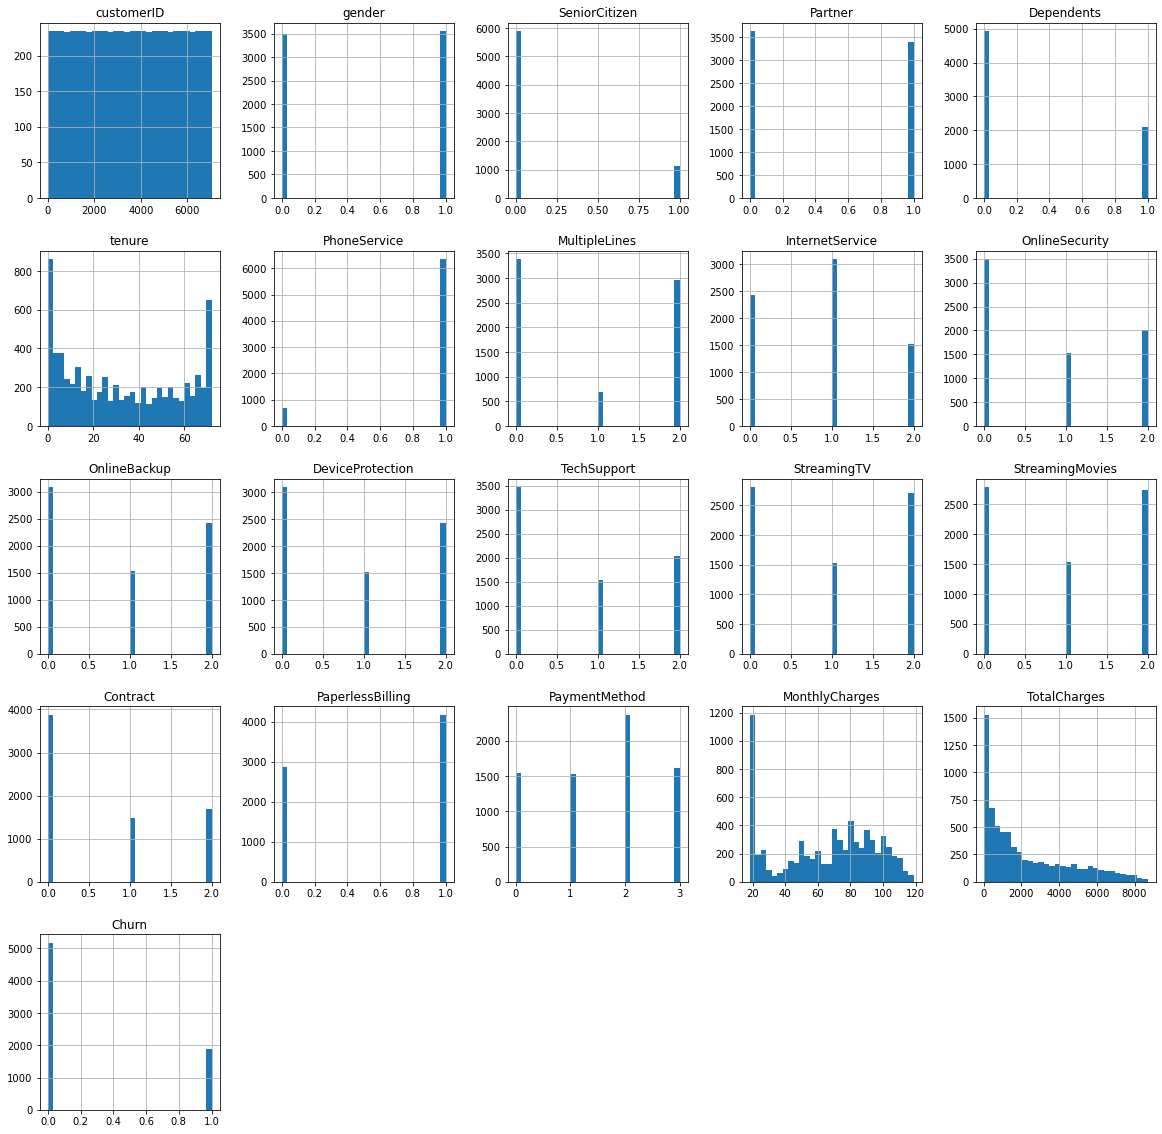

In [18]:
#histogram plot to analysie data
data.hist(figsize=(20,20),grid=True,layout=(5,5),bins=30)

In [19]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
#filling null values
data.fillna(data.mean(), inplace=True)

In [21]:
# checking for skewed data 
data.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

In [22]:
#removing skewness
from sklearn.preprocessing import power_transform
df_new=power_transform(data)

df_new=pd.DataFrame(df_new,columns=data.columns)

In [23]:
df_new.skew()

customerID         -0.290930
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.144899
Churn               1.063031
dtype: float64

In [24]:
#for value count
data["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

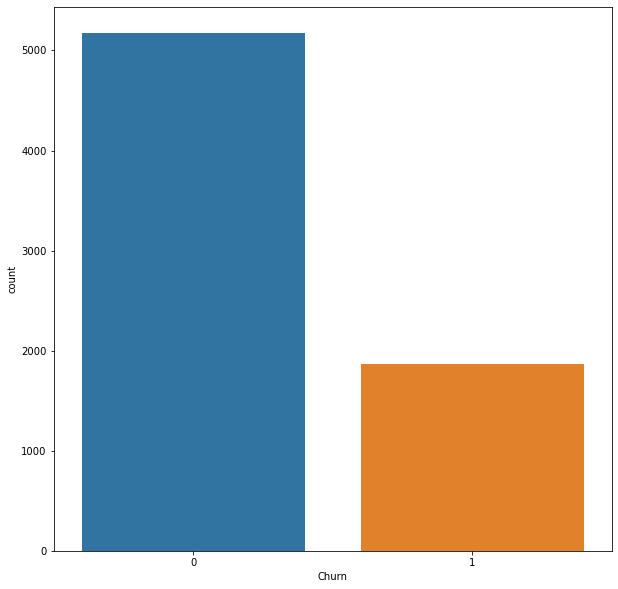

In [25]:
#checking for imbalance
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='Churn',data=data)

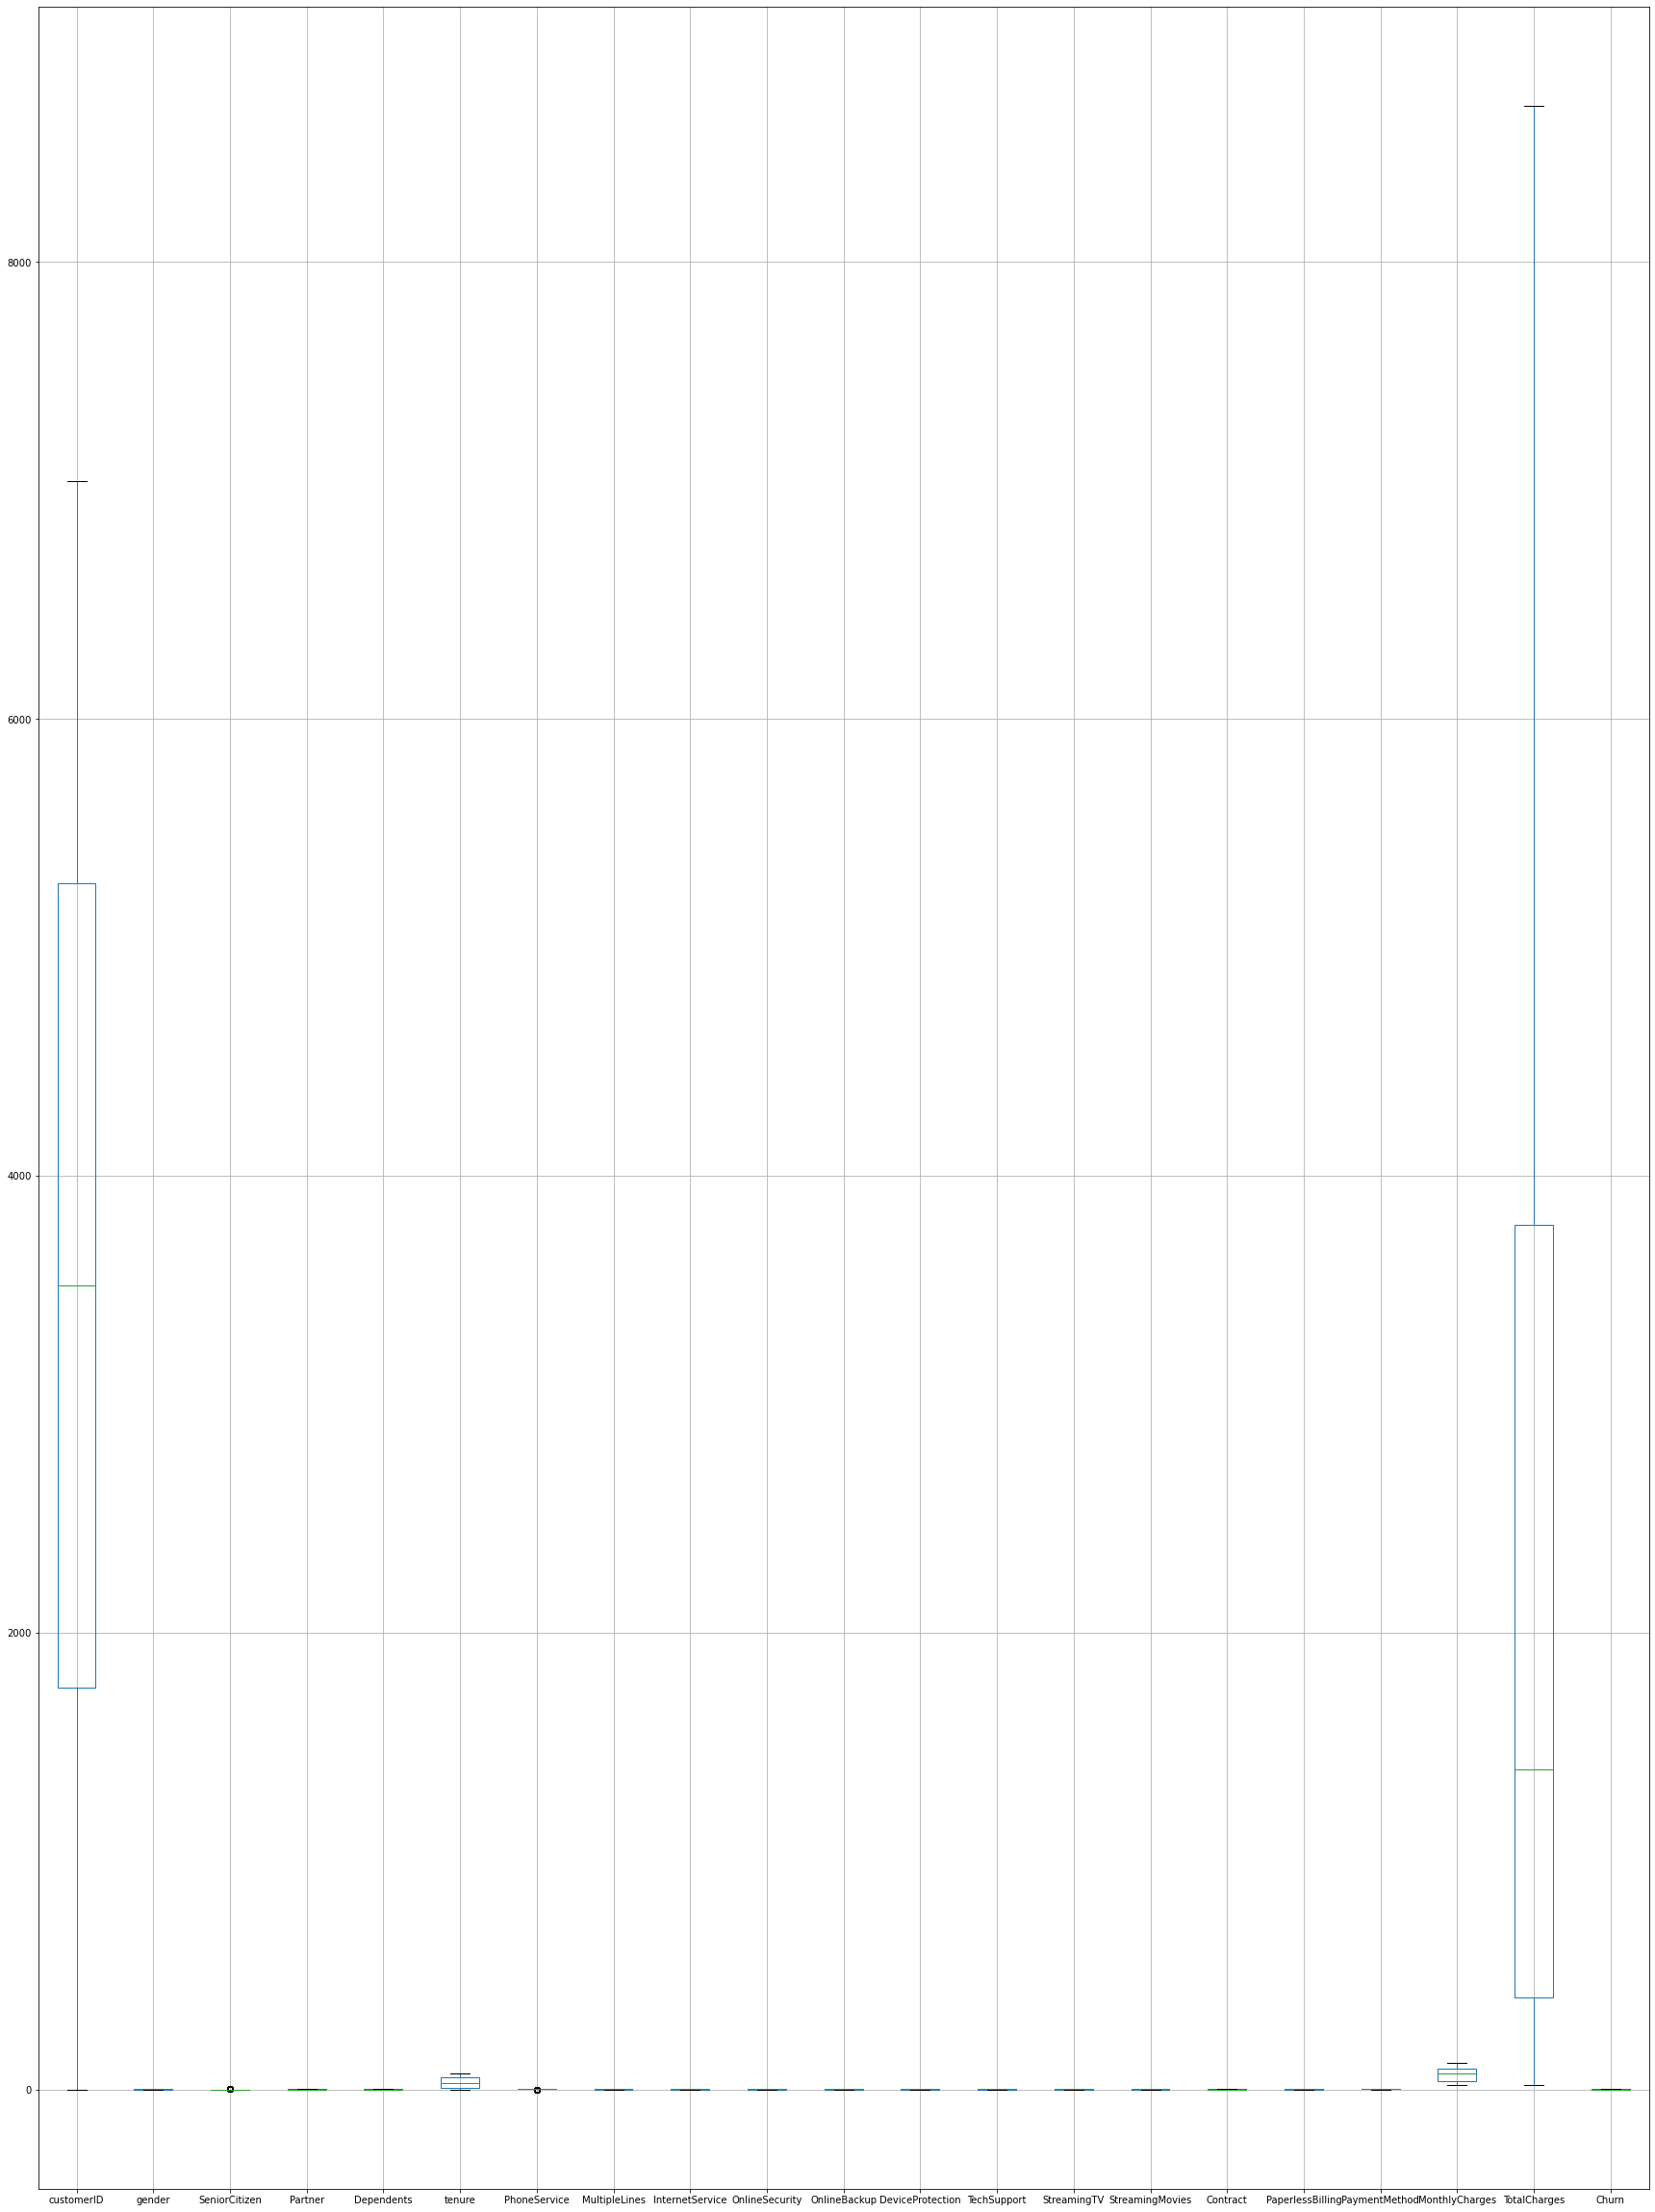

In [26]:
# plotting boxplot to identify outliers
data.boxplot(figsize=[30,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

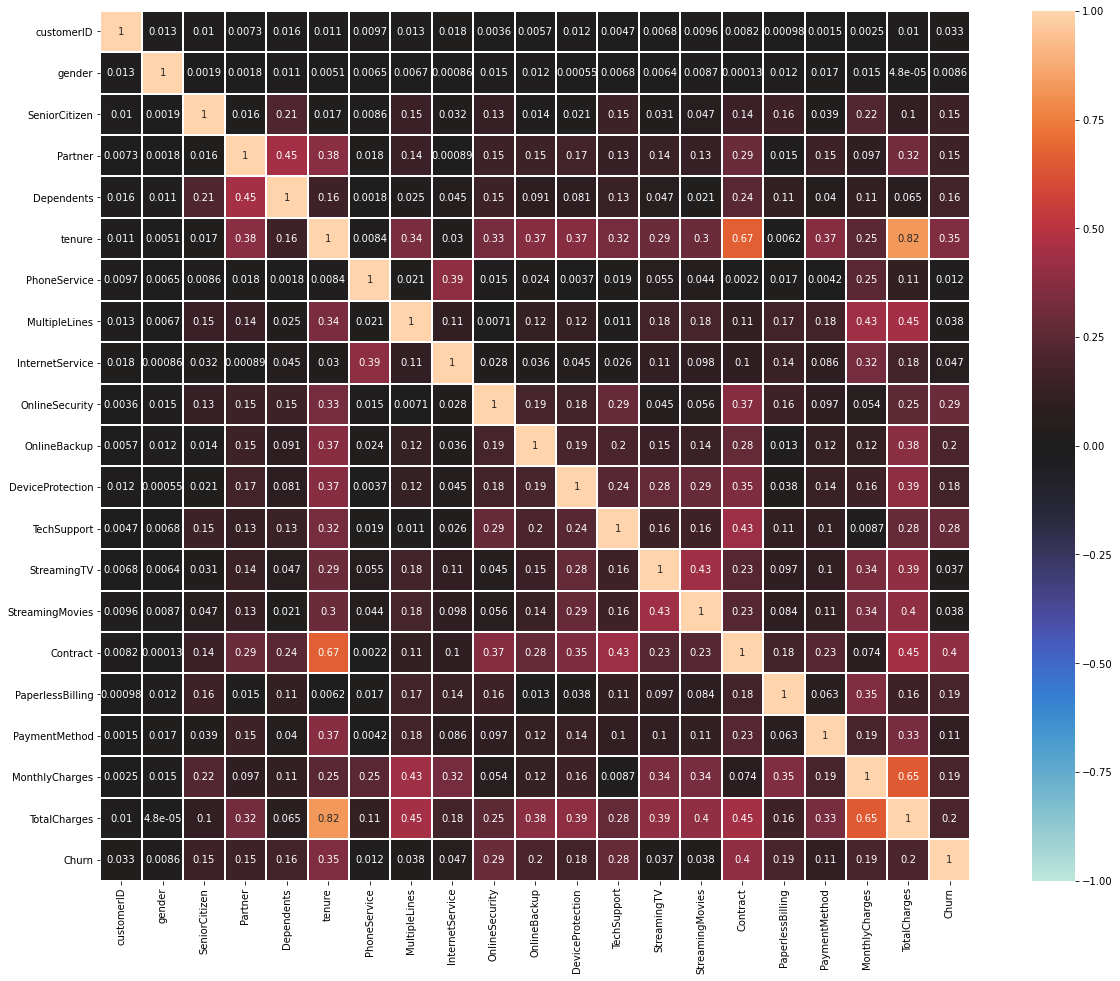

In [27]:
# checking of corelation using heat map
df_corr =data.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,  vmin=-1,annot=True,
           square=True,center=0,fmt='.2g',linewidths=1,)
plt.tight_layout

In [28]:
sc=StandardScaler()
x=sc.fit_transform(data)
x

array([[-0.03885617, -1.00955867, -0.43991649, ..., -1.16032292,
        -0.99497138, -0.60102348],
       [ 0.39298839,  0.99053183, -0.43991649, ..., -0.25962894,
        -0.17387565, -0.60102348],
       [-1.26602267,  0.99053183, -0.43991649, ..., -0.36266036,
        -0.96039939,  1.66382851],
       ...,
       [-1.08551361, -1.00955867, -0.43991649, ..., -1.1686319 ,
        -0.85518222, -0.60102348],
       [ 1.2360198 ,  0.99053183,  2.27315869, ...,  0.32033821,
        -0.87277729,  1.66382851],
       [ 1.67524212,  0.99053183, -0.43991649, ...,  1.35896134,
         2.01391739, -0.60102348]])

In [29]:
# splitting the data in x and y form for test and train
y=data['Churn']

x=data.drop(columns=['Churn'])

In [30]:
#offerfitting problem
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over = SM.fit_resample(x,y)

In [31]:
y_over.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25)

In [33]:
#agorithm use to predict the model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred=log_reg.predict(x_test)

In [35]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7920371086200232

In [36]:
#using dtc algoritm
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
clf.score(x_train,y_train)

1.0

In [38]:
y_pred=clf.predict(x_test)

In [39]:
clf.score(x_test,y_test)

0.7730962504831852

In [40]:
#agorithm use to predict the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

In [41]:
print(accuracy_score(y_test,predrf))

0.8461538461538461


In [42]:
print(confusion_matrix(y_test,predrf))

[[1075  214]
 [ 184 1114]]


In [43]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1289
           1       0.84      0.86      0.85      1298

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



In [45]:
# using support vector regression
from sklearn.svm import SVC
svr=SVC()
svr.fit(x_train,y_train)
ad_pred = svr.predict(x_test)

In [46]:
#accuracy score
print(accuracy_score(y_test,predrf))

0.8461538461538461


In [47]:
#use of matrix
print(confusion_matrix(y_test,predrf))

[[1075  214]
 [ 184 1114]]


In [48]:
#printing classification report 
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1289
           1       0.84      0.86      0.85      1298

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



In [49]:
#probability
probes = rf.predict_proba(x_test)

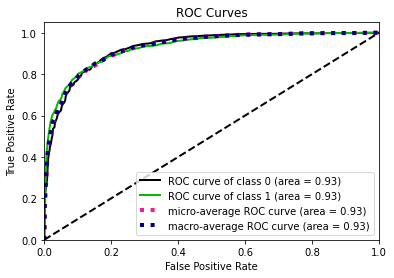

In [50]:
#roc curve
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,probes)
plt.show()

In [51]:
#importing library for roc_auc curve
from sklearn.metrics import roc_auc_score

In [52]:
#score
roc_auc_score(y_test,predrf)

0.8461116403944243

In [53]:
#implementing lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()

In [54]:
parameters = {"alpha":[15, 14, 35, 40, 13, 24, 17, 50, 11, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(x, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [15, 14, 35, 40, 13, 24, 17, 50, 11, 20]},
             scoring='neg_mean_squared_error')

In [55]:
print(lasso_regression.best_params_)

{'alpha': 11}


In [56]:
print(lasso_regression.best_score_)

-0.1871652114412393


In [57]:
#calculating crosss validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(log_reg,x,y,cv=5)
print(scr.mean())

0.8020732184334471


In [58]:
#calculating crosss validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(clf,x,y,cv=5)
print(scr.mean())

0.7271029582553713


In [59]:
#calculating crosss validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf,x,y,cv=5)
print(scr.mean())

0.7948329327698561


In [60]:
#k nearest neighbour algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(
n_neighbors = 22, 
metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [61]:
y_pred  = classifier.predict(x_test)

In [62]:
acc = accuracy_score(y_test, y_pred )


In [63]:
print(accuracy_score(y_test,predrf))

0.8461538461538461


In [66]:
#use of matrix
print(confusion_matrix(y_test,predrf))

[[1075  214]
 [ 184 1114]]


In [67]:
#printing classification report 
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1289
           1       0.84      0.86      0.85      1298

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



In [64]:
#calculating crosss validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(classifier,x,y,cv=5)
print(scr.mean())

0.7342067431769792


In [65]:
roc_auc_score(y_test,predrf)

0.8461116403944243

In [81]:
# saving the model
import pickle

from sklearn import model_selection
filename = 'customer.sav'
pickle.dump(data, open(filename, 'wb'))